In [91]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.impute import KNNImputer

In [92]:
fraud = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [198]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# droping columns

In [93]:
fraud1 = fraud.drop(['_c39'], axis=1)

# Null Values

In [94]:
fraud1.isin(['?','-',' ']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [95]:
fraud1['collision_type'].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [96]:
fraud1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [97]:
fraud1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [98]:
fraud1['collision_type'] = fraud1['collision_type'].str.replace('?', 'Rear Collision')
fraud1['property_damage'] = fraud1['property_damage'].str.replace('?', 'NO')
fraud1['police_report_available'] = fraud1['police_report_available'].str.replace('?', 'NO')

C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\3835574641.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fraud1['collision_type'] = fraud1['collision_type'].str.replace('?', 'Rear Collision')
C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\3835574641.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fraud1['property_damage'] = fraud1['property_damage'].str.replace('?', 'NO')
C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\3835574641.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fraud1['police_report_a

In [99]:
fraud1.isin(['?','-',' ']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Skewness 

In [100]:
fraud1.skew()

C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\2046892528.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fraud1.skew()


months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [101]:
# umbrella_limit, insured_zip, total_claim_amount and vehicle_claim  

# kurtosis

In [102]:
fraud1.kurtosis()

C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\63851111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fraud1.kurtosis()


months_as_customer            -0.485428
age                           -0.260255
policy_number                 -1.132638
policy_deductable             -1.376943
policy_annual_premium          0.073889
umbrella_limit                 1.792077
insured_zip                   -1.190711
capital-gains                 -1.276704
capital-loss                  -1.313875
incident_hour_of_the_day      -1.192940
number_of_vehicles_involved   -1.500467
bodily_injuries               -1.513178
witnesses                     -1.343629
total_claim_amount            -0.454081
injury_claim                  -0.763087
property_claim                -0.376386
vehicle_claim                 -0.446573
auto_year                     -1.171868
dtype: float64

# Description of data

In [103]:
fraud1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Data Presentation and Analysis

# bodily_injurie + incident_severity

<Axes: xlabel='bodily_injuries'>

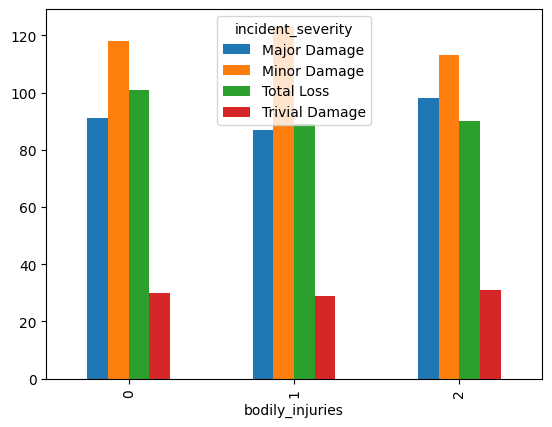

In [35]:
pd.crosstab(fraud['bodily_injuries'], fraud['incident_severity']).plot(kind='bar')

In [24]:
pd.crosstab(fraud['bodily_injuries'], fraud['incident_severity'])

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
bodily_injuries,,,,
0,91,118,101,30
1,87,123,89,29
2,98,113,90,31


# incident_type vs collision_type

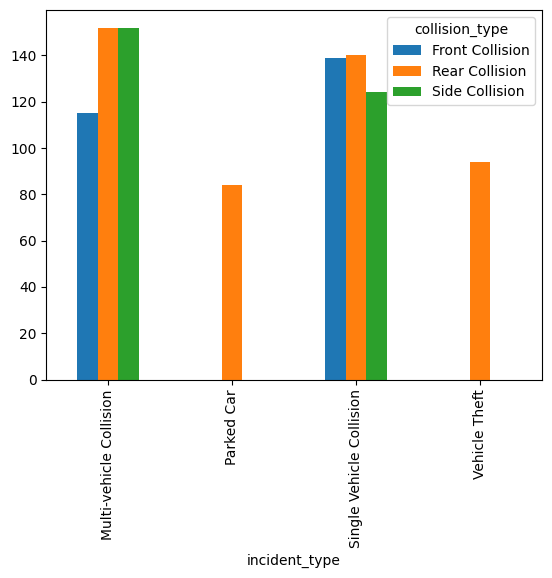

In [49]:

pd.crosstab(fraud1['incident_type'], fraud1['collision_type']).plot(kind='bar')

plt.show()

In [36]:
pd.crosstab(fraud['incident_type'], fraud['collision_type'])

collision_type,?,Front Collision,Rear Collision,Side Collision
incident_type,,,,
Multi-vehicle Collision,0,115,152,152
Parked Car,84,0,0,0
Single Vehicle Collision,0,139,140,124
Vehicle Theft,94,0,0,0


# collision_type vs number_of_vehicles_involved

<Axes: xlabel='collision_type'>

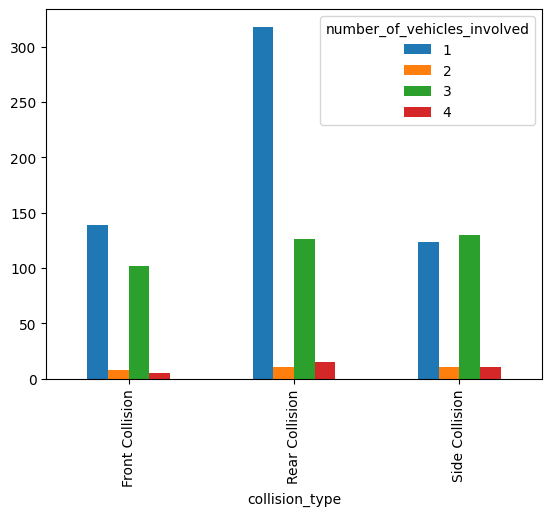

In [53]:
pd.crosstab(fraud1['collision_type'], fraud1['number_of_vehicles_involved']).plot(kind='bar')

In [51]:
pd.crosstab(fraud1['collision_type'], fraud1['number_of_vehicles_involved'])

number_of_vehicles_involved,1,2,3,4
collision_type,,,,
Front Collision,139,8,102,5
Rear Collision,318,11,126,15
Side Collision,124,11,130,11


# incident_state

<Axes: xlabel='incident_state'>

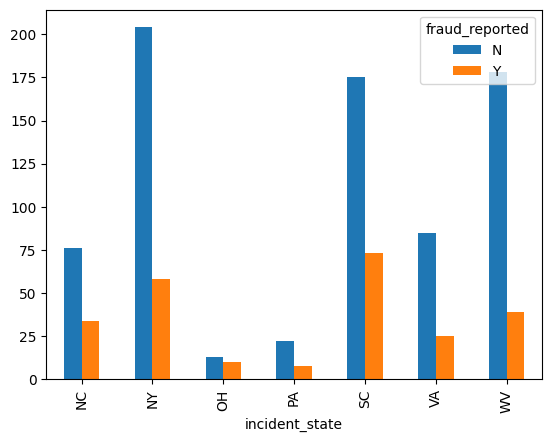

In [31]:
pd.crosstab(fraud['incident_state'], fraud['fraud_reported']).plot(kind='bar')

In [26]:
pd.crosstab(fraud['incident_state'], fraud['fraud_reported'])

fraud_reported,N,Y
incident_state,,
NC,76,34
NY,204,58
OH,13,10
PA,22,8
SC,175,73
VA,85,25
WV,178,39


# incident_city vs fraud_reported

<Axes: xlabel='incident_city'>

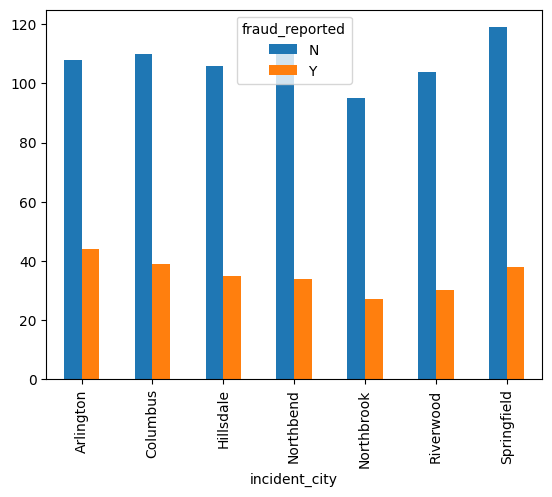

In [33]:
pd.crosstab(fraud['incident_city'], fraud['fraud_reported']).plot(kind='bar') 

# collision_type vs fraud_reported

<Axes: xlabel='collision_type'>

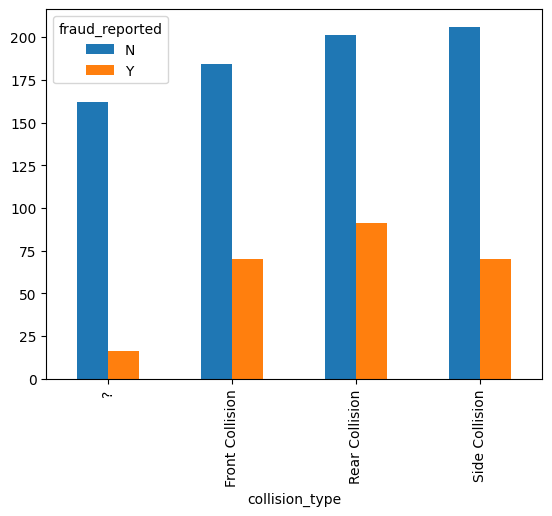

In [27]:
pd.crosstab(fraud['collision_type'], fraud['fraud_reported']).plot(kind='bar')

In [35]:
pd.crosstab(fraud['collision_type'], fraud['fraud_reported']) 

fraud_reported,N,Y
collision_type,,
?,162,16
Front Collision,184,70
Rear Collision,201,91
Side Collision,206,70


# incident_hour_of_the_day vs fraud_reported

<Axes: xlabel='incident_hour_of_the_day'>

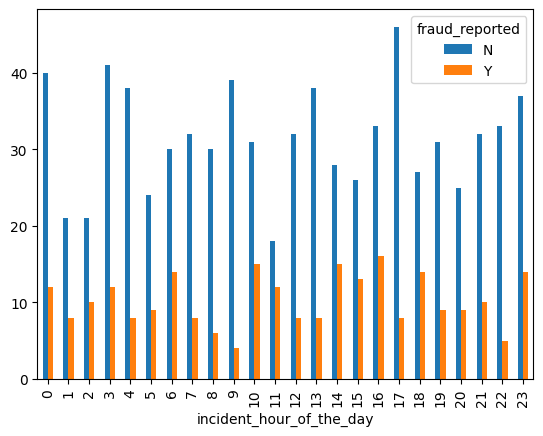

In [37]:
pd.crosstab(fraud['incident_hour_of_the_day'], fraud['fraud_reported']).plot(kind='bar')  

In [28]:
pd.crosstab(fraud['incident_hour_of_the_day'], fraud['fraud_reported'])

fraud_reported,N,Y
incident_hour_of_the_day,,
0,40,12
1,21,8
2,21,10
3,41,12
4,38,8
5,24,9
6,30,14
7,32,8
8,30,6


# witnesses vs fraud_reported

<Axes: ylabel='fraud_reported'>

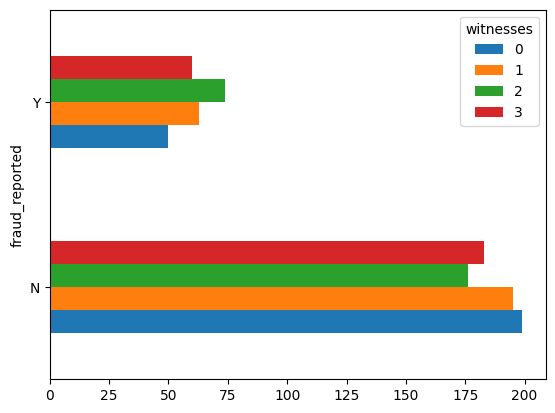

In [67]:
pd.crosstab(fraud1['fraud_reported'], fraud1['witnesses']).plot(kind='barh')

In [66]:
pd.crosstab(fraud1['fraud_reported'], fraud1['witnesses'])

witnesses,0,1,2,3
fraud_reported,,,,
N,199,195,176,183
Y,50,63,74,60


# univarite analysis

# male and female 

<Axes: xlabel='insured_sex', ylabel='Count'>

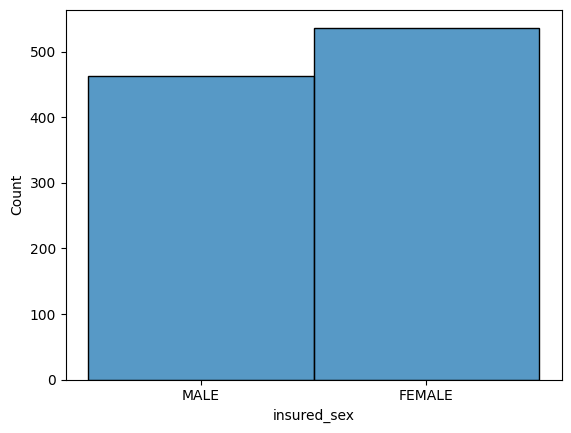

In [38]:
sns.histplot(data=fraud1, x='insured_sex')

In [39]:
fraud1['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

# policy_annual_premium

<Axes: xlabel='policy_annual_premium', ylabel='Count'>

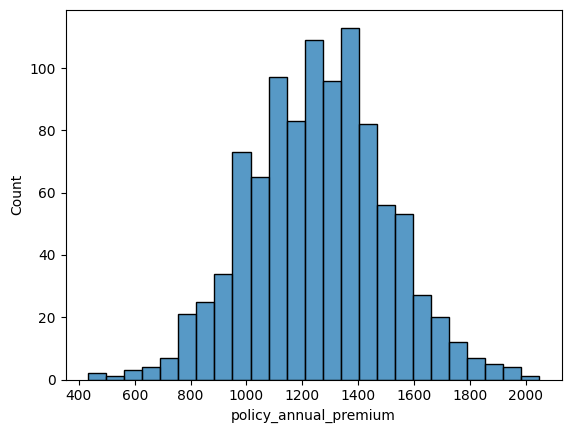

In [40]:
sns.histplot(data=fraud1, x='policy_annual_premium')

# insured_education_level

<Axes: xlabel='insured_education_level', ylabel='Count'>

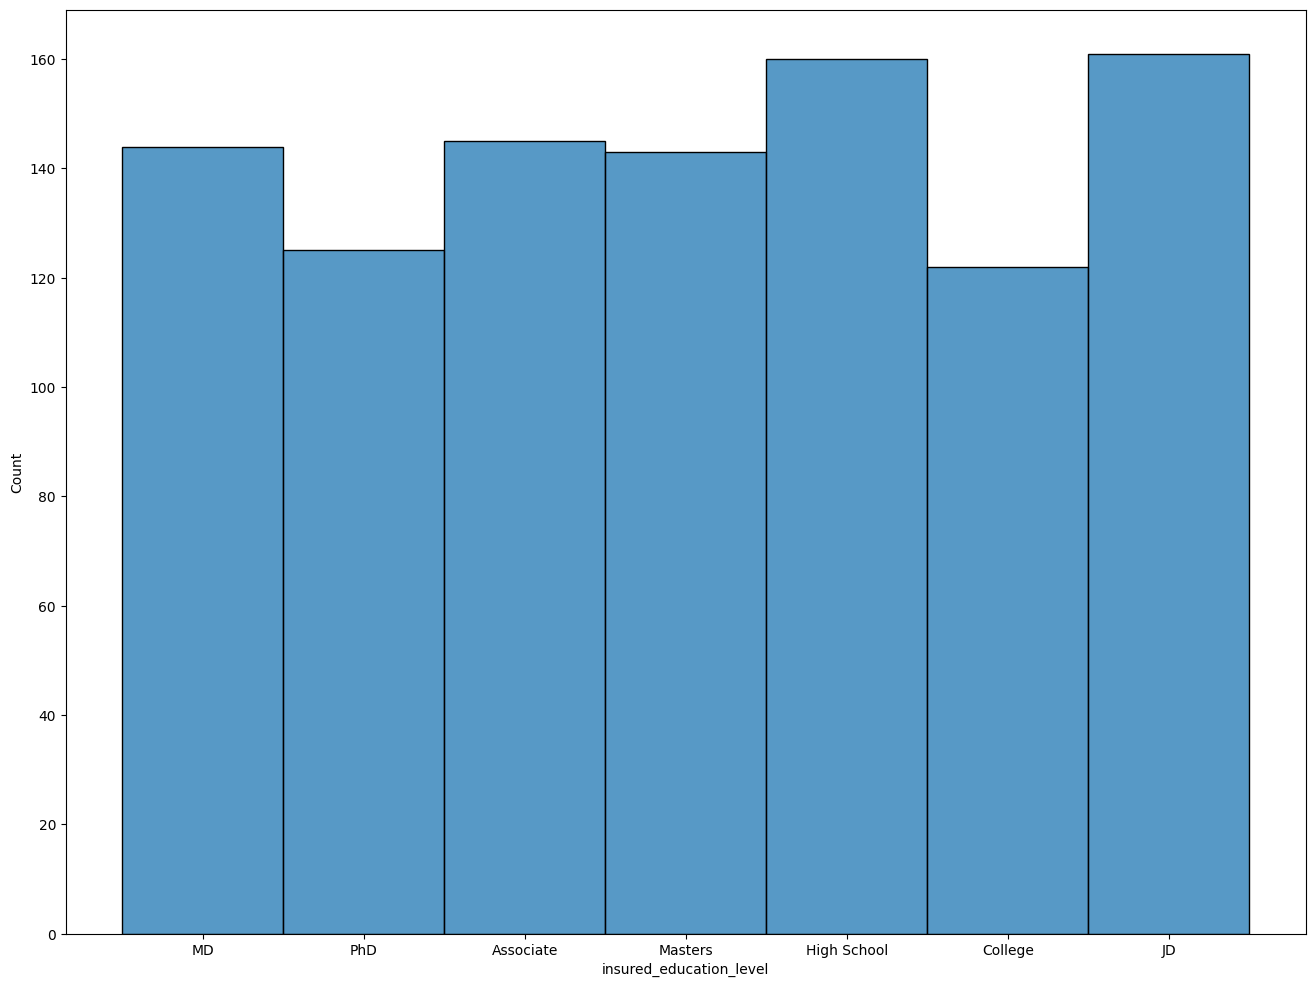

In [43]:
plt.figure(figsize=(16,12))
sns.histplot(data=fraud1, x='insured_education_level')

# insured_occupation

<Axes: xlabel='Count', ylabel='insured_occupation'>

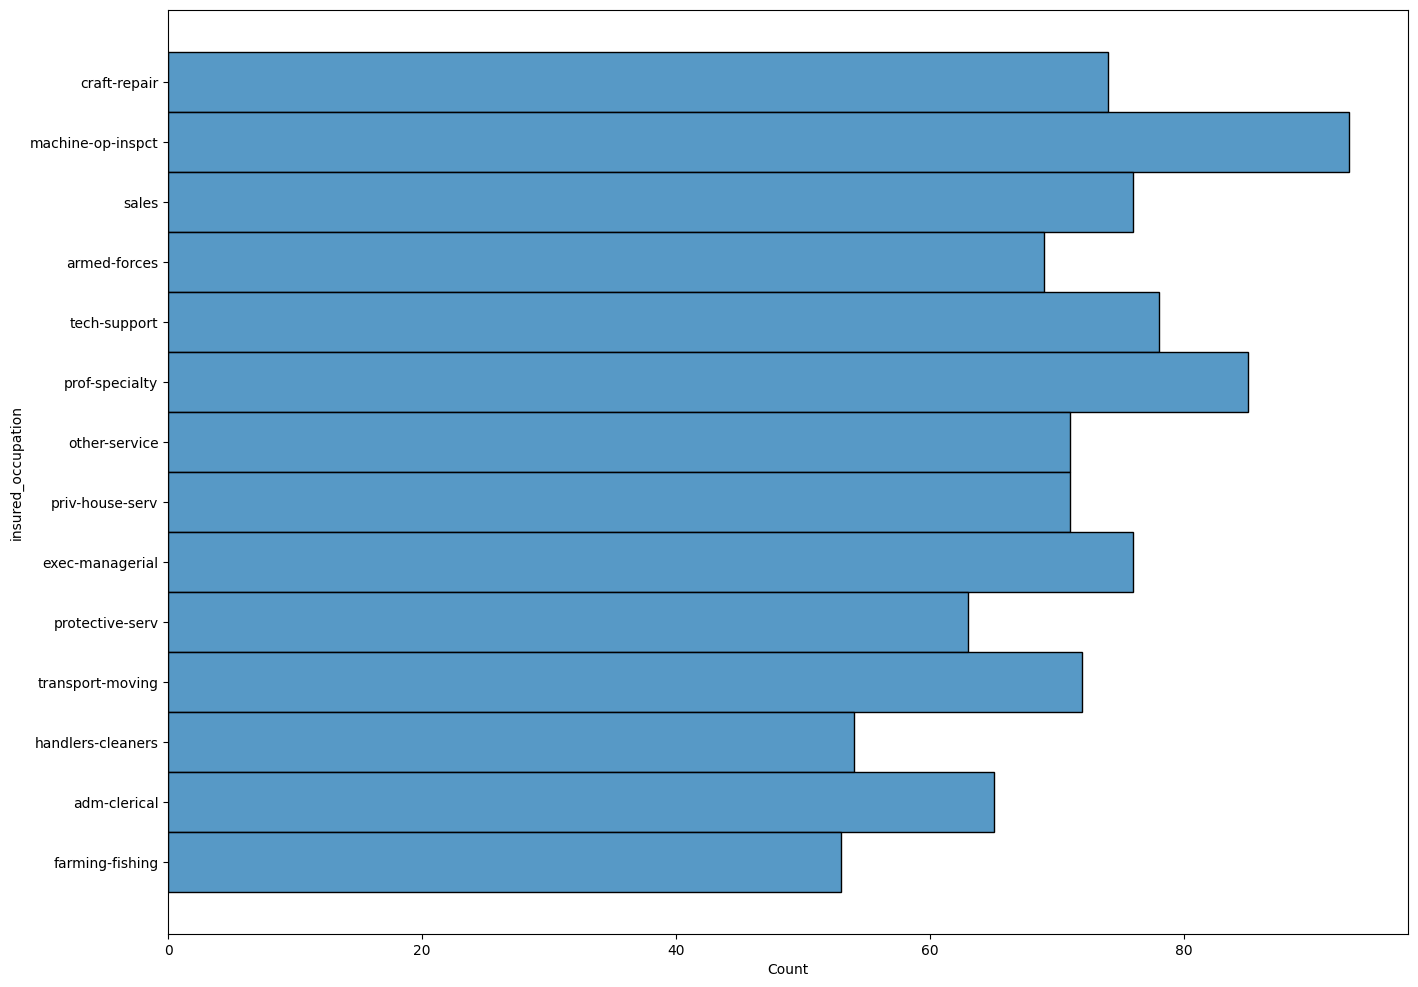

In [45]:
plt.figure(figsize=(16,12))
sns.histplot(data=fraud1, y='insured_occupation')

# incident_severity

<Axes: xlabel='incident_severity', ylabel='Count'>

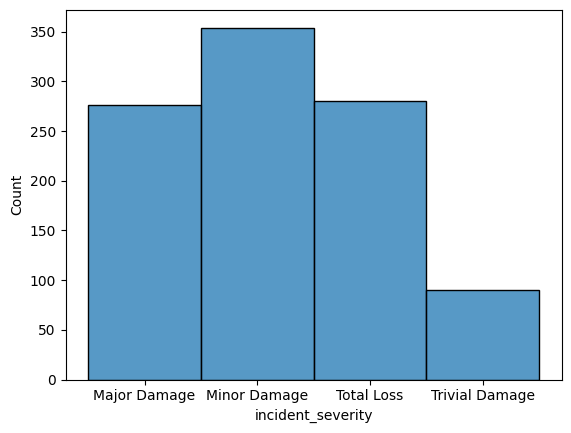

In [51]:
sns.histplot(data=fraud1, x='incident_severity')

# collision_type

<Axes: xlabel='collision_type', ylabel='Count'>

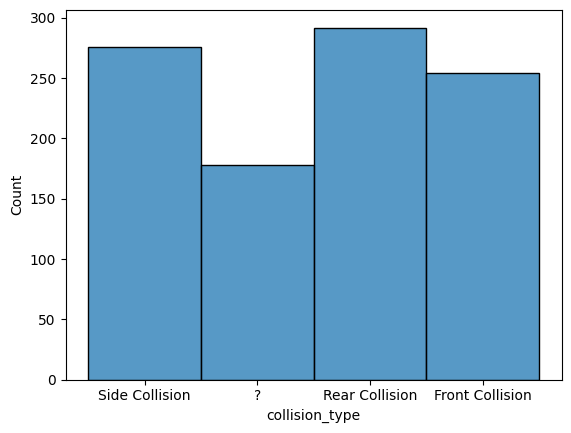

In [52]:
sns.histplot(data=fraud1, x='collision_type')

# vehicle_claim

<Axes: xlabel='vehicle_claim', ylabel='Count'>

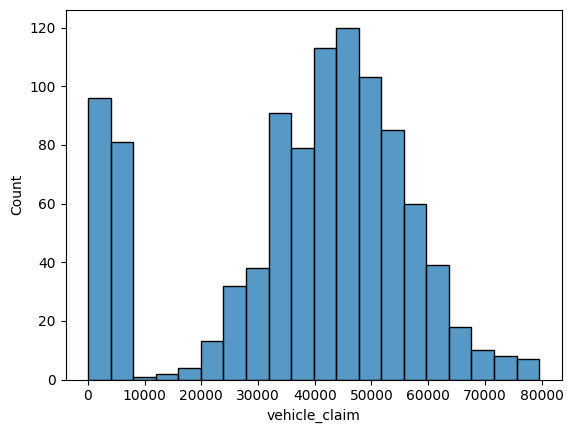

In [55]:
sns.histplot(data=fraud1, x='vehicle_claim')

# witnesses

In [62]:
fraud1['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<Axes: xlabel='witnesses'>

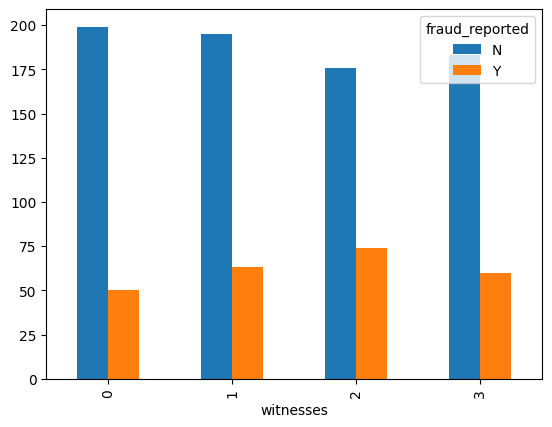

In [89]:
pd.crosstab(fraud1['witnesses'], fraud1['fraud_reported']).plot(kind='bar')

In [63]:
pd.crosstab(fraud1['witnesses'], fraud1['fraud_reported'])

fraud_reported,N,Y
witnesses,,
0,199,50
1,195,63
2,176,74
3,183,60


# police_report_available

In [199]:
pd.crosstab(fraud1['police_report_available'], fraud1['fraud_reported'])

fraud_reported,N,Y
police_report_available,,
NO,511,175
YES,242,72


<Axes: ylabel='police_report_available'>

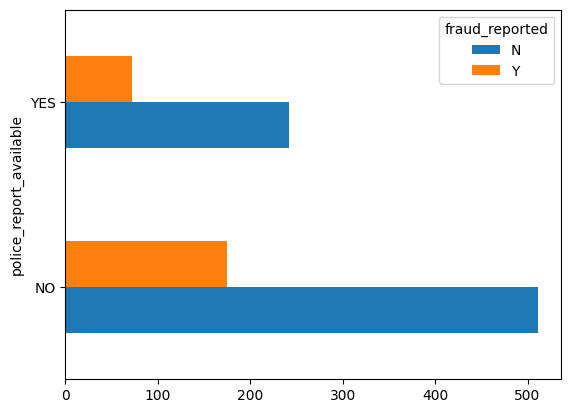

In [200]:
pd.crosstab(fraud1['police_report_available'], fraud1['fraud_reported']).plot(kind='barh')

# feature engineering

# 1) Date Time column

In [104]:
fraud1['policy_bind_date'] = pd.to_datetime(fraud1['policy_bind_date'])
fraud1['incident_date'] = pd.to_datetime(fraud1['incident_date'])

C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\2900151964.py:1: UserWarning: Parsing '17-10-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fraud1['policy_bind_date'] = pd.to_datetime(fraud1['policy_bind_date'])
C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\2900151964.py:1: UserWarning: Parsing '27-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fraud1['policy_bind_date'] = pd.to_datetime(fraud1['policy_bind_date'])
C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\2900151964.py:1: UserWarning: Parsing '25-05-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fraud1['policy_bind_date'] = pd.to_datetime(fraud1['policy_bind_date'])
C:\Users\ravin\AppData\Local\Temp\ipykernel_13156\2900151964.py:1: UserWarning: Parsing '25-07-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True fo

In [105]:
fraud1['year_policy'] = fraud1['policy_bind_date'].dt.year
fraud1['month_policy'] = fraud1['policy_bind_date'].dt.month
fraud1['day_policy'] = fraud1['policy_bind_date'].dt.day

fraud1['year_incident'] = fraud1['incident_date'].dt.year
fraud1['month_incident'] = fraud1['incident_date'].dt.month
fraud1['day_incident'] = fraud1['incident_date'].dt.day

In [106]:
fraud1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,year_policy,month_policy,day_policy,year_incident,month_incident,day_incident
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,Honda,Accord,2006,N,1991,7,16,2015,2,22
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,Volkswagen,Passat,2015,N,2014,5,1,2015,1,24
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,Suburu,Impreza,1996,N,2003,2,17,2015,1,23
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,Audi,A5,1998,N,2011,11,18,2015,2,26


# 2) Outliers detection and removal

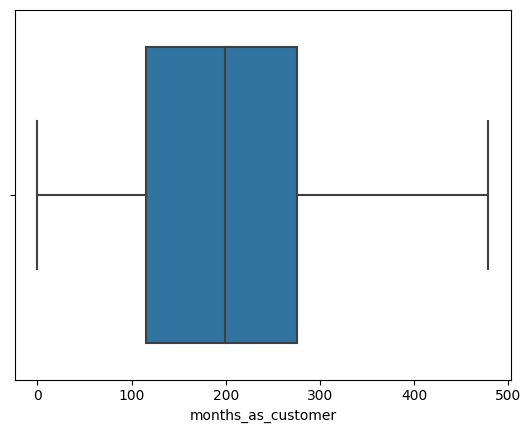

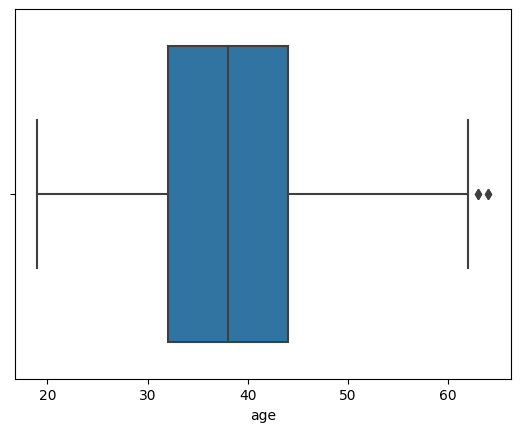

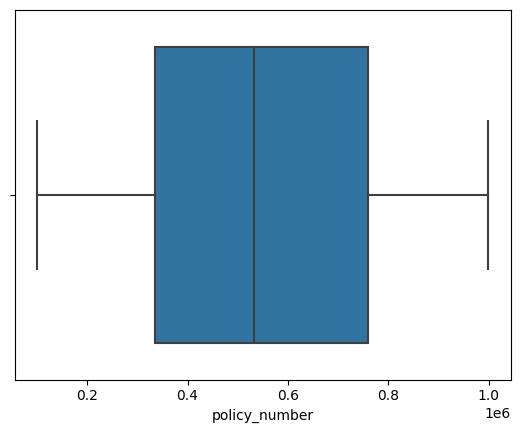

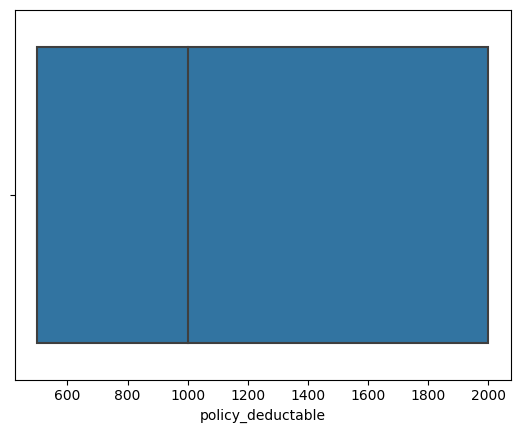

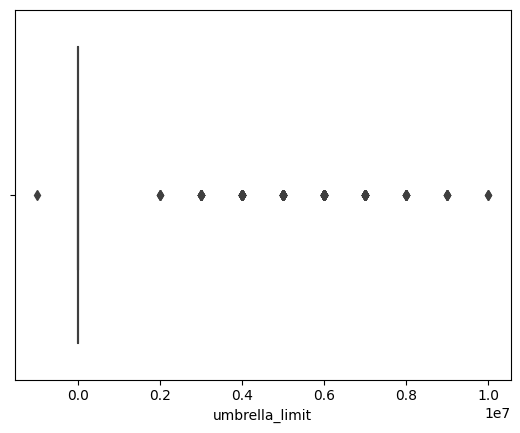

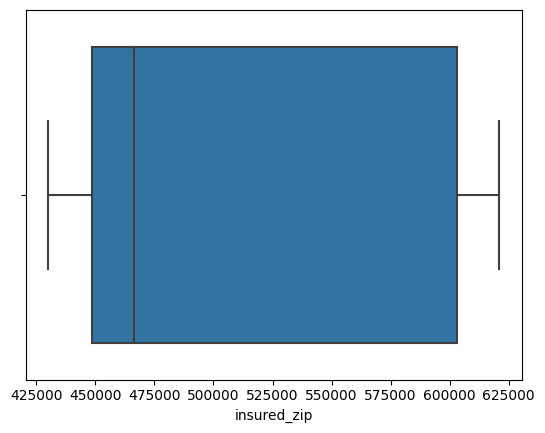

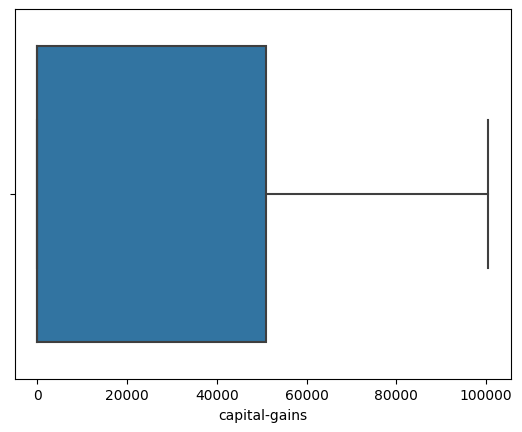

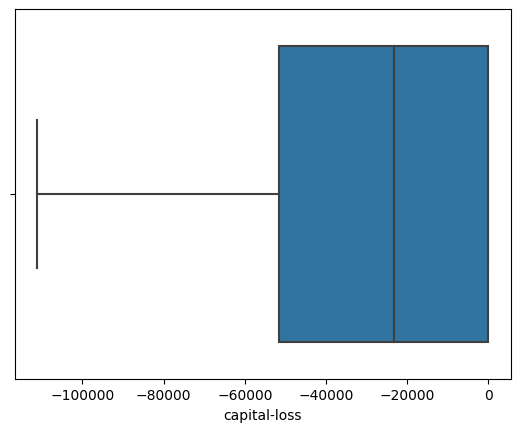

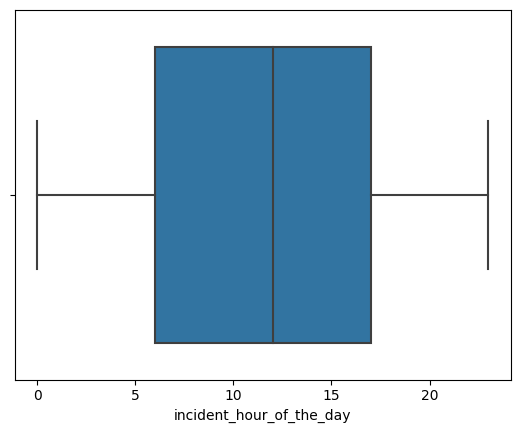

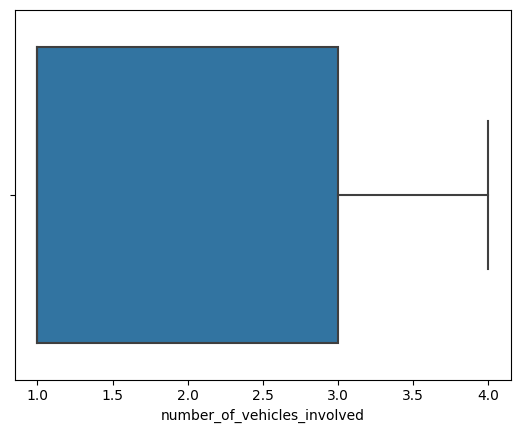

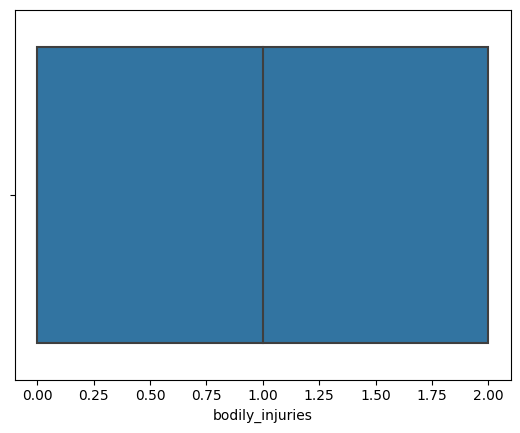

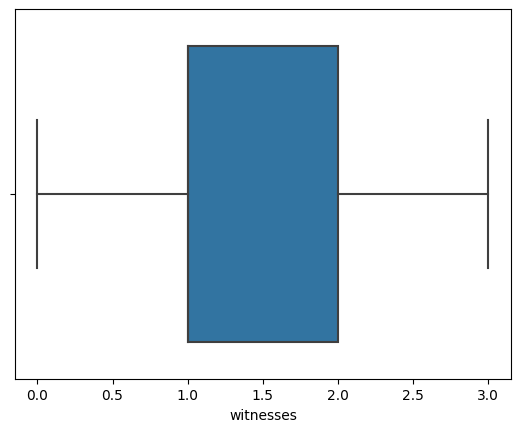

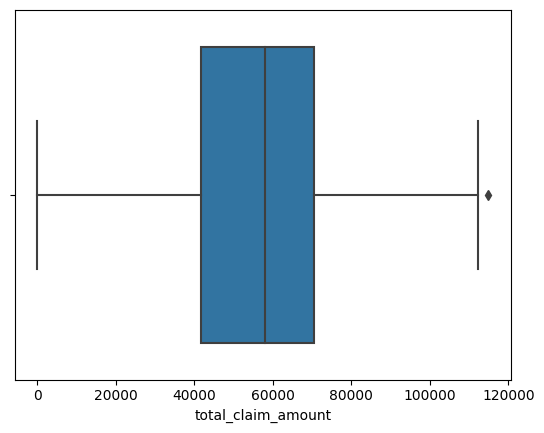

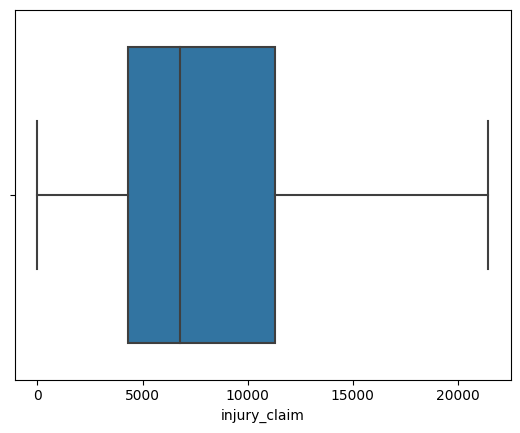

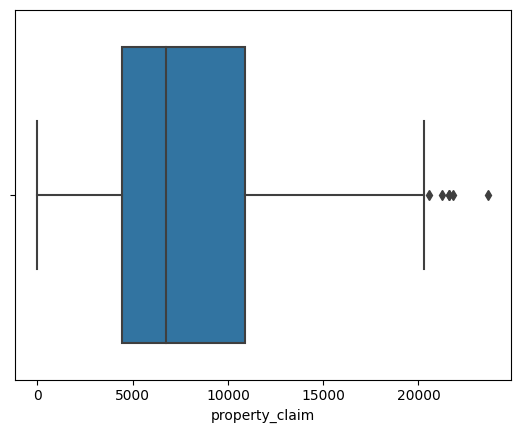

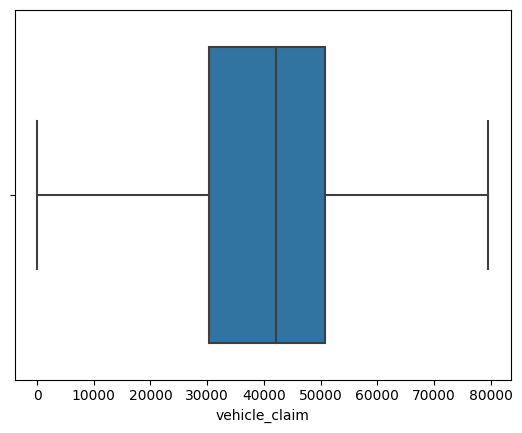

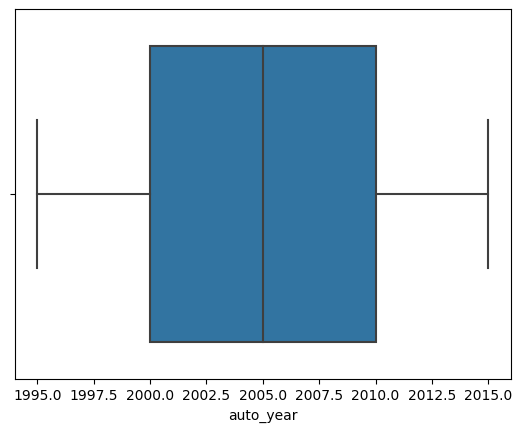

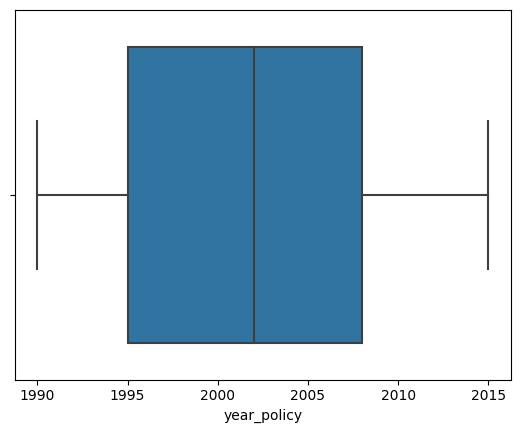

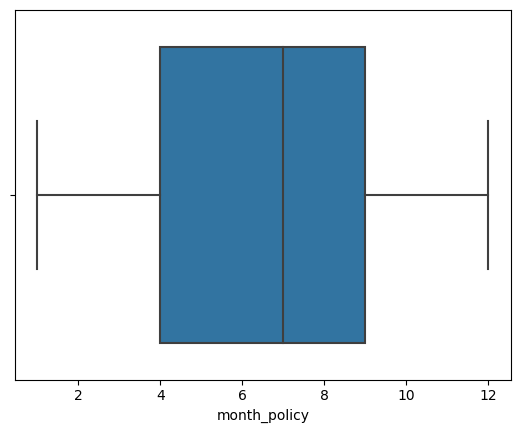

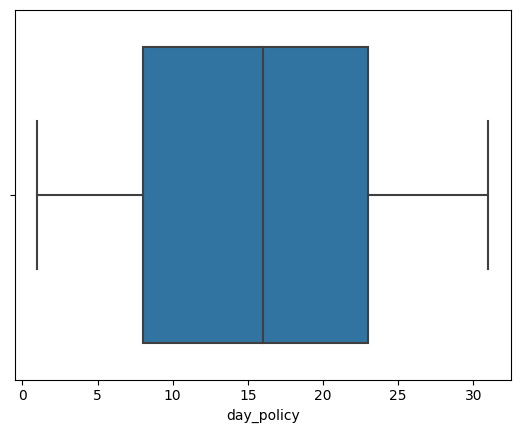

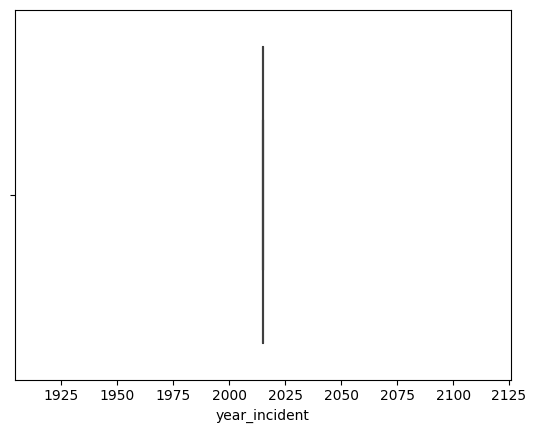

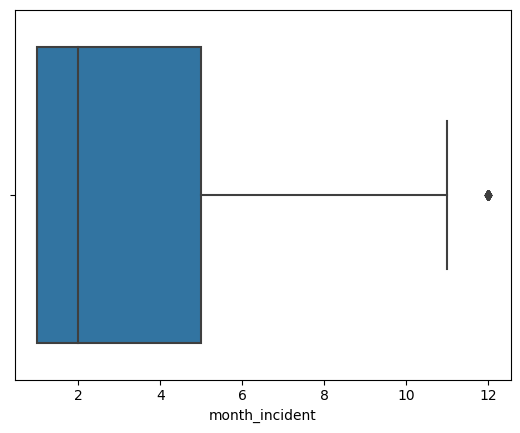

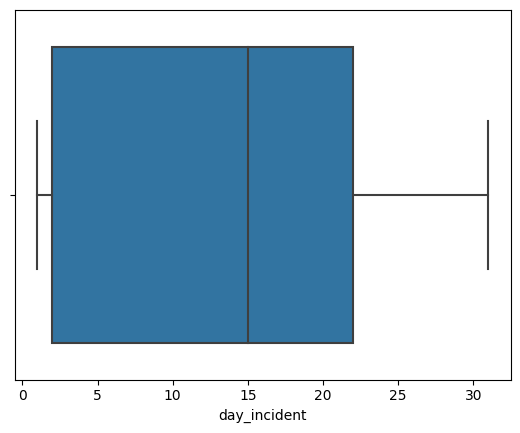

In [107]:
for i in fraud1.columns:
    if fraud1[i].dtype =='int64':
        sns.boxplot(data=fraud1, x=i)
        plt.show()

In [108]:
columns1 = ['age', 'umbrella_limit', 'total_claim_amount', 'property_claim', 'month_incident']

In [109]:
for i in columns1:
    q25 = fraud1[i].quantile(0.25)
    q75 = fraud1[i].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    lower = q25 - 1.5 * iqr
    print(',,,,,,,,,,,,,,,,,,,')
    print(i)
    print(',,,,,,,,,,,,,,,,,,,,')
    print(upper)
    print(lower)
    print(',,,,,,,,,,,,,,,,,,,,,')

,,,,,,,,,,,,,,,,,,,
age
,,,,,,,,,,,,,,,,,,,,
62.0
14.0
,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
umbrella_limit
,,,,,,,,,,,,,,,,,,,,
0.0
0.0
,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
total_claim_amount
,,,,,,,,,,,,,,,,,,,,
113762.5
-1357.5
,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
property_claim
,,,,,,,,,,,,,,,,,,,,
20545.0
-5215.0
,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
month_incident
,,,,,,,,,,,,,,,,,,,,
11.0
-5.0
,,,,,,,,,,,,,,,,,,,,,


In [110]:
fraud2 = fraud1[fraud1['age'] <= 62.0]
fraud3 = fraud2[fraud2['month_incident'] <= 11.0]
fraud4 = fraud3[fraud3['property_claim'] <= 20545.0]
fraud5 = fraud4[fraud4['total_claim_amount'] <= 113762.5]


In [111]:
Fraud = fraud5.reset_index(drop=True)
Fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,year_policy,month_policy,day_policy,year_incident,month_incident,day_incident
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,Honda,Accord,2006,N,1991,7,16,2015,2,22
946,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,Volkswagen,Passat,2015,N,2014,5,1,2015,1,24
947,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,Suburu,Impreza,1996,N,2003,2,17,2015,1,23
948,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,Audi,A5,1998,N,2011,11,18,2015,2,26


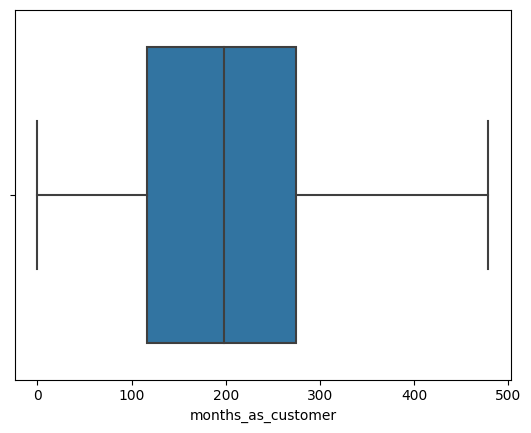

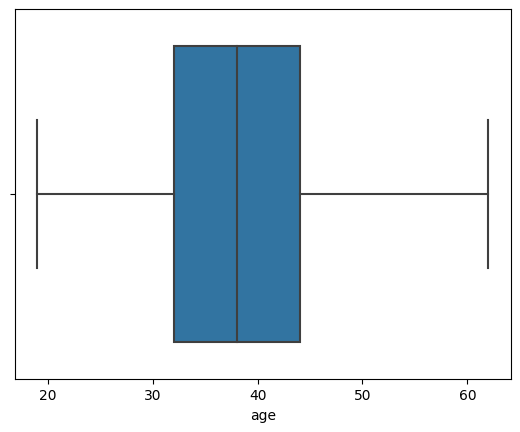

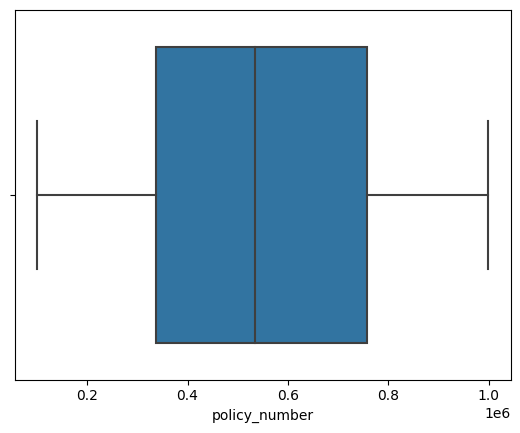

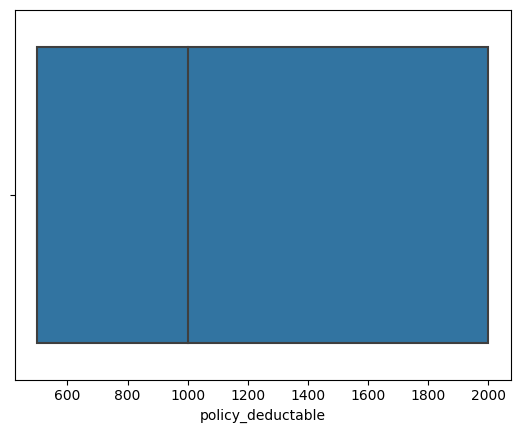

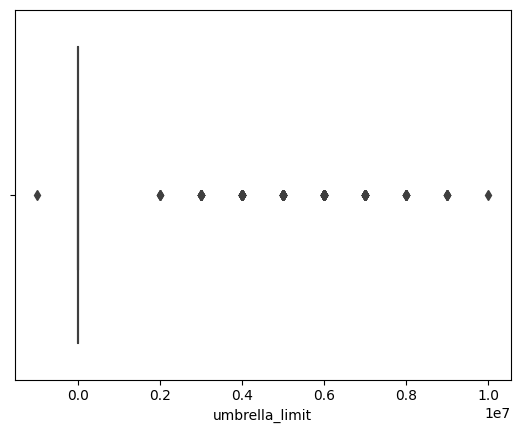

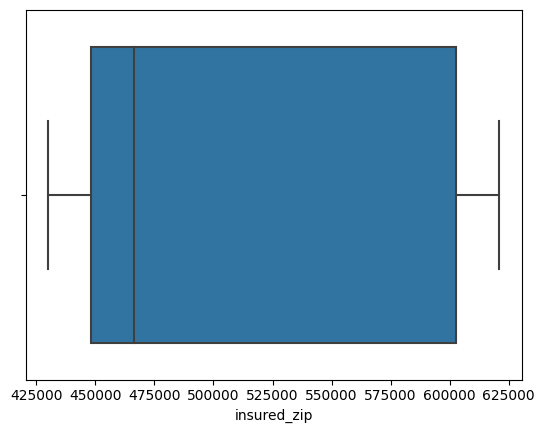

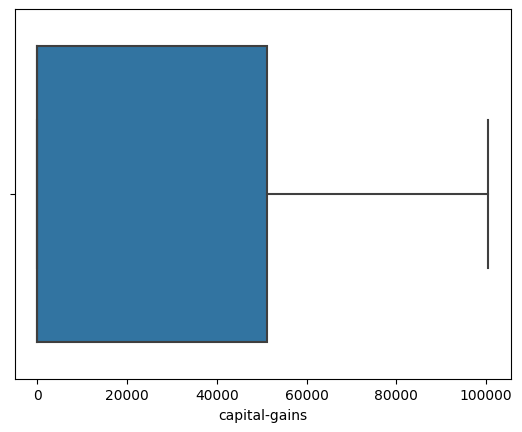

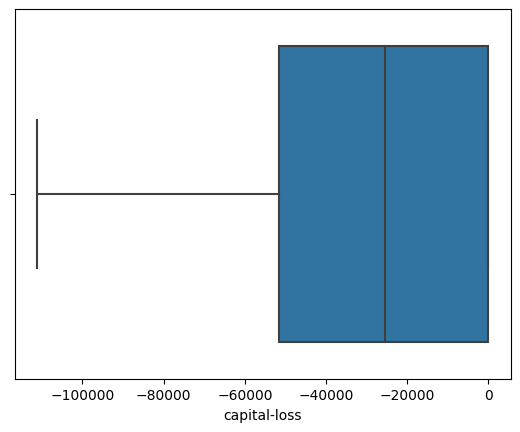

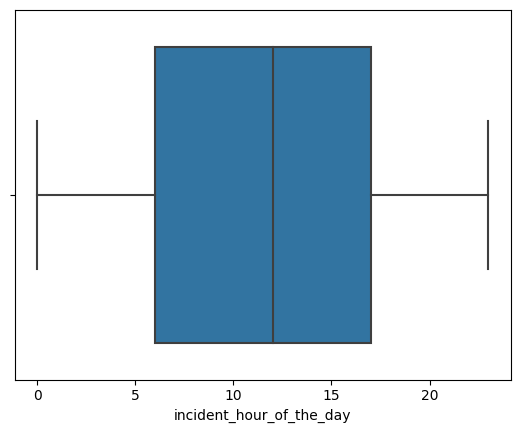

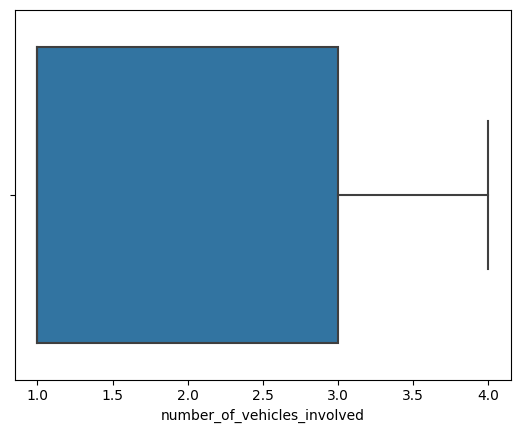

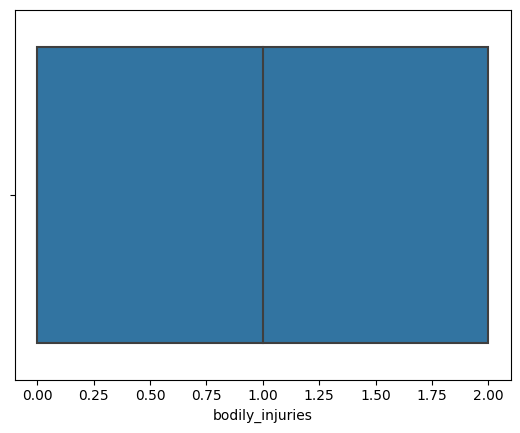

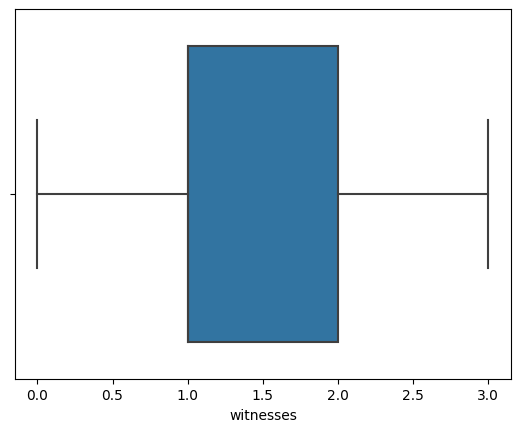

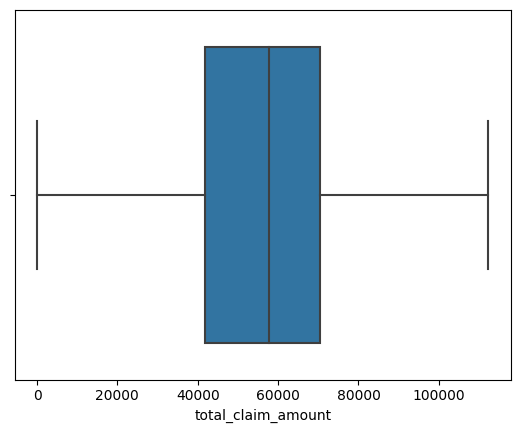

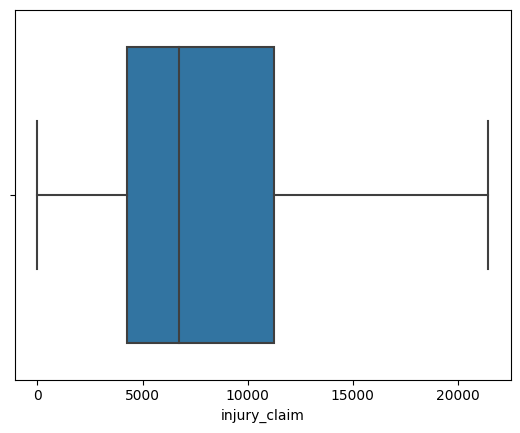

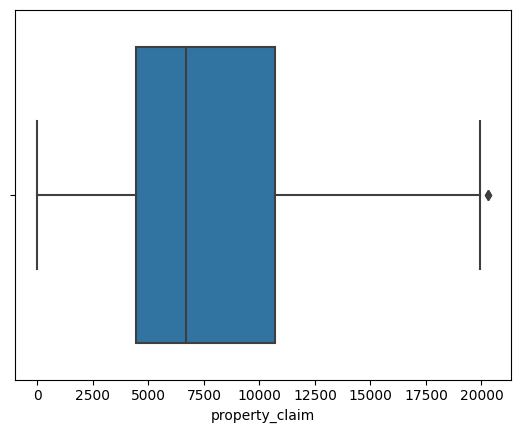

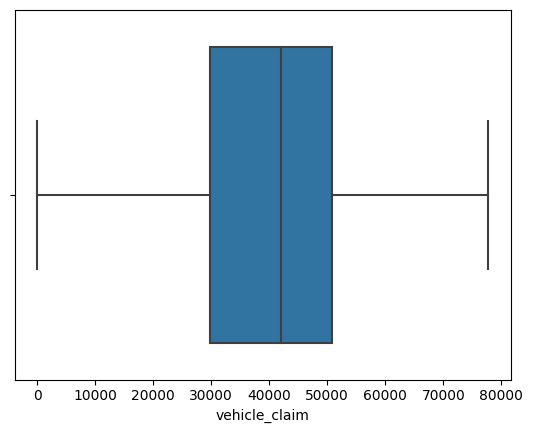

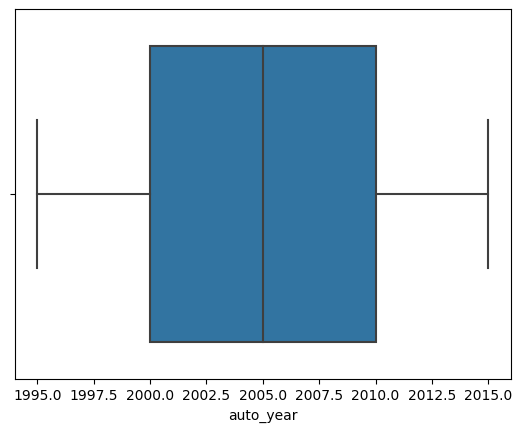

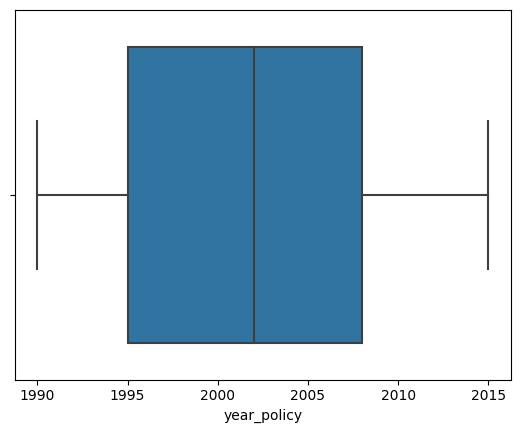

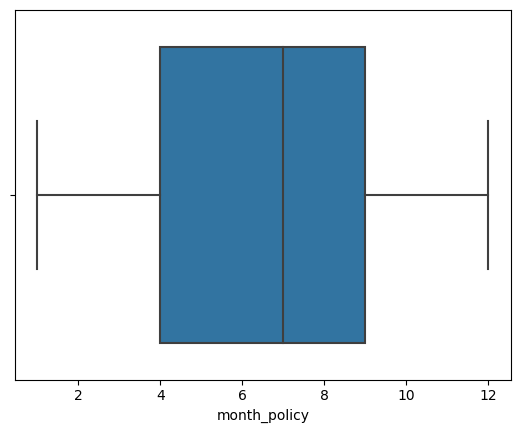

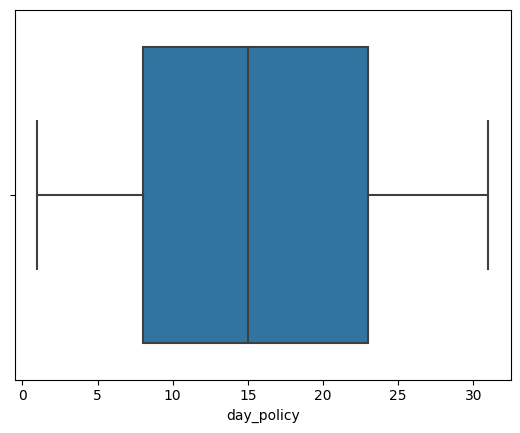

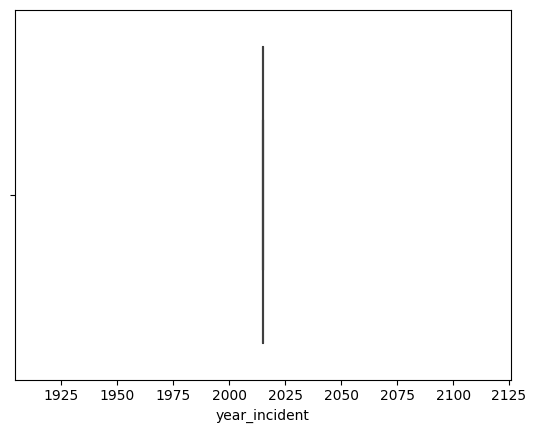

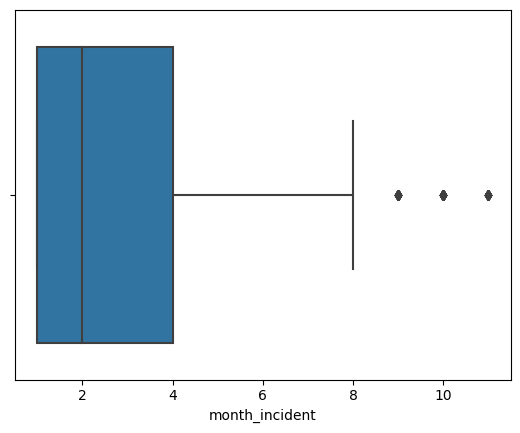

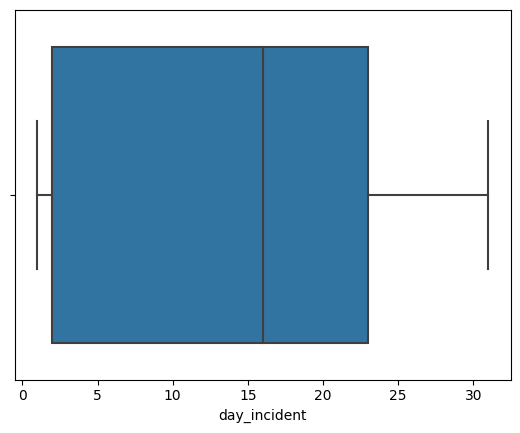

In [112]:
for i in Fraud.columns:
    if Fraud[i].dtype =='int64':
        sns.boxplot(data=Fraud, x=i)
        plt.show()

# Loss of Information

In [113]:
50 / 1000*100

5.0

# 3) sepration of categorical and numerical columns

In [114]:
cate = [i for i in Fraud.columns if Fraud[i].dtype =='object']

categorical = Fraud[cate]

In [115]:
num = [i for i in Fraud.columns if Fraud[i].dtype !='object']

numerical = Fraud[num]
numerical1 = numerical.drop(['policy_bind_date','incident_date'], axis=1)

In [116]:
numerical1

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,injury_claim,property_claim,vehicle_claim,auto_year,year_policy,month_policy,day_policy,year_incident,month_incident,day_incident
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,6510,13020,52080,2004,2014,10,17,2015,1,25
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,780,780,3510,2007,2006,6,27,2015,1,21
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,7700,3850,23100,2007,2000,6,9,2015,2,22
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,6340,6340,50720,2014,1990,5,25,2015,10,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,1300,650,4550,2009,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,3,38,941851,1000,1310.80,0,431289,0,0,20,...,17440,8720,61040,2006,1991,7,16,2015,2,22
946,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,18080,18080,72320,2015,2014,5,1,2015,1,24
947,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,7500,7500,52500,1996,2003,2,17,2015,1,23
948,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,5220,5220,36540,1998,2011,11,18,2015,2,26


In [117]:
categorical

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NO,Honda,Accord,N
946,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NO,Volkswagen,Passat,N
947,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,NO,YES,Suburu,Impreza,N
948,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,NO,YES,Audi,A5,N


# 4) Feature Engineering 

# encoder

# Manual Encoder

In [118]:
replaced = categorical['insured_education_level'].replace({'High School': 0, 'Associate': 1, 'College':2, 'JD': 3, 'MD':4, 'Masters': 5, 'PhD': 6})

In [119]:
replaced.value_counts()

0    152
3    152
1    138
4    137
5    135
6    118
2    118
Name: insured_education_level, dtype: int64

# Binary Encoder

In [120]:
columns = ['policy_state','policy_csl','insured_sex','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','police_report_available']    

In [121]:
import category_encoders as ce

In [122]:
encoder = ce.BinaryEncoder(cols=columns)

In [123]:
encoded = pd.DataFrame(encoder.fit_transform(categorical))

In [124]:
encoded1 = encoded.drop(['insured_hobbies','auto_make','auto_model','fraud_reported','insured_occupation','incident_state','incident_city','incident_location','insured_education_level'], axis=1)

In [125]:
encoded1

,policy_state_0,policy_state_1,policy_csl_0,policy_csl_1,insured_sex_0,insured_sex_1,insured_relationship_0,insured_relationship_1,insured_relationship_2,incident_type_0,...,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1
0,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
1,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,1,0
3,1,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
4,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0,1,1,1,1,0,1,0,0,0,...,0,1,0,0,1,1,0,1,1,0
946,1,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,1,0,1,1,0
947,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
948,1,1,1,1,0,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,1


# Label Encoder

In [126]:
column1 = ['insured_occupation','insured_hobbies','incident_state','incident_city','incident_location','auto_make','auto_model','fraud_reported']

In [127]:
le = LabelEncoder()

In [128]:
encoded2 = pd.DataFrame()

for i in column1:
    encoded2[i] = le.fit_transform(categorical[i])

In [129]:
encoded3 = encoded2.drop(['fraud_reported'], axis=1) 

In [130]:
encoded3

,insured_occupation,insured_hobbies,incident_state,incident_city,incident_location,auto_make,auto_model
0,2,17,4,1,946,10,1
1,6,15,5,5,596,8,12
2,11,2,1,1,651,4,30
3,1,2,2,0,636,3,34
4,11,2,1,0,209,0,31
...,...,...,...,...,...,...,...
945,2,13,0,4,532,6,6
946,9,17,4,3,216,13,28
947,1,3,0,0,710,11,19
948,5,0,1,0,540,1,5


# merging of encoded 

In [131]:
y = encoded2['fraud_reported']

In [132]:
merged = pd.merge(encoded3, encoded1, left_index=True, right_index=True)

In [133]:
merged['insured_education_level'] = replaced


In [134]:
merged

,insured_occupation,insured_hobbies,incident_state,incident_city,incident_location,auto_make,auto_model,policy_state_0,policy_state_1,policy_csl_0,...,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1,insured_education_level
0,2,17,4,1,946,10,1,0,1,0,...,0,1,0,0,1,0,1,0,1,4
1,6,15,5,5,596,8,12,1,0,0,...,1,0,0,0,1,1,0,1,0,4
2,11,2,1,1,651,4,30,0,1,1,...,1,0,0,0,1,1,0,1,0,6
3,1,2,2,0,636,3,34,1,1,0,...,0,1,0,0,1,1,0,1,0,6
4,11,2,1,0,209,0,31,1,1,1,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2,13,0,4,532,6,6,0,1,1,...,1,0,0,1,1,0,1,1,0,5
946,9,17,4,3,216,13,28,1,1,1,...,0,1,0,1,1,0,1,1,0,6
947,1,3,0,0,710,11,19,0,1,0,...,1,0,0,0,1,1,0,0,1,5
948,5,0,1,0,540,1,5,1,1,1,...,0,1,1,0,0,1,0,0,1,1


In [135]:
merged.skew()

insured_occupation          -0.065257
insured_hobbies             -0.052972
incident_state              -0.145612
incident_city                0.048668
incident_location            0.000000
auto_make                   -0.040720
auto_model                  -0.077746
policy_state_0              -0.632396
policy_state_1              -0.799104
policy_csl_0                -0.627538
policy_csl_1                -0.617852
insured_sex_0               -0.152257
insured_sex_1                0.152257
insured_relationship_0       0.114048
insured_relationship_1      -0.114048
insured_relationship_2      -0.046402
incident_type_0              3.024051
incident_type_1             -0.046402
incident_type_2             -1.668489
collision_type_0            -1.004966
collision_type_1            -0.131012
incident_severity_0          2.881135
incident_severity_1         -0.565262
incident_severity_2         -0.237821
authorities_contacted_0      0.417873
authorities_contacted_1      0.809658
authorities_

# Numerical column operation

In [136]:
numerical1

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,injury_claim,property_claim,vehicle_claim,auto_year,year_policy,month_policy,day_policy,year_incident,month_incident,day_incident
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,6510,13020,52080,2004,2014,10,17,2015,1,25
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,780,780,3510,2007,2006,6,27,2015,1,21
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,7700,3850,23100,2007,2000,6,9,2015,2,22
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,6340,6340,50720,2014,1990,5,25,2015,10,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,1300,650,4550,2009,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,3,38,941851,1000,1310.80,0,431289,0,0,20,...,17440,8720,61040,2006,1991,7,16,2015,2,22
946,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,18080,18080,72320,2015,2014,5,1,2015,1,24
947,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,7500,7500,52500,1996,2003,2,17,2015,1,23
948,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,5220,5220,36540,1998,2011,11,18,2015,2,26


# Distribution of Data

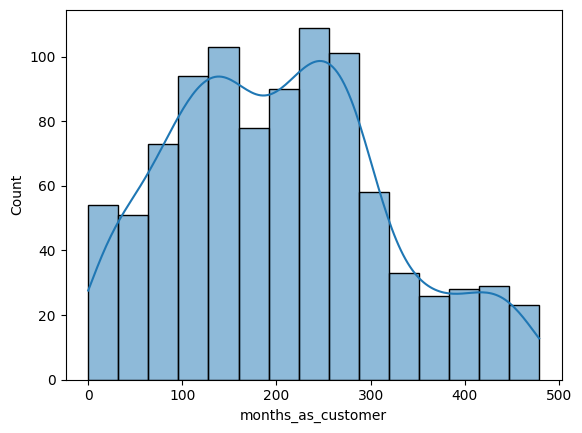

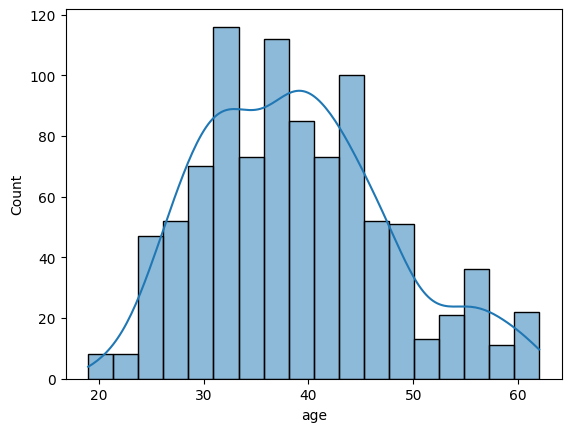

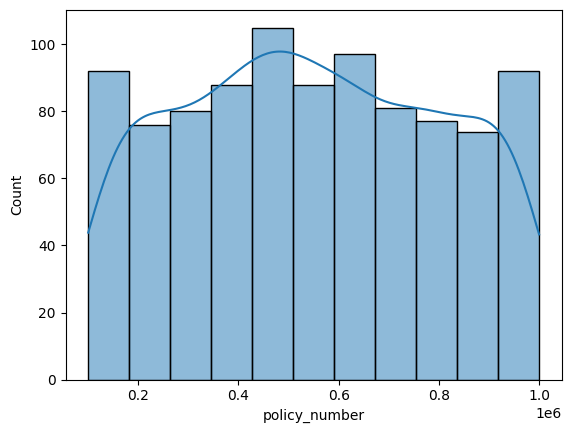

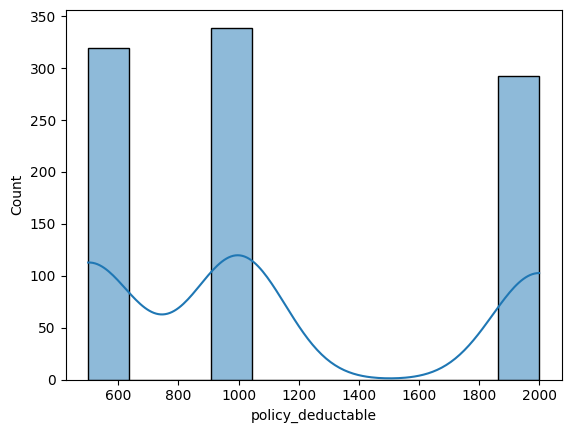

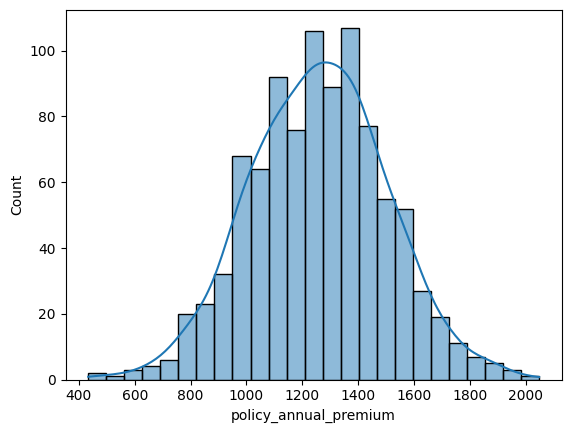

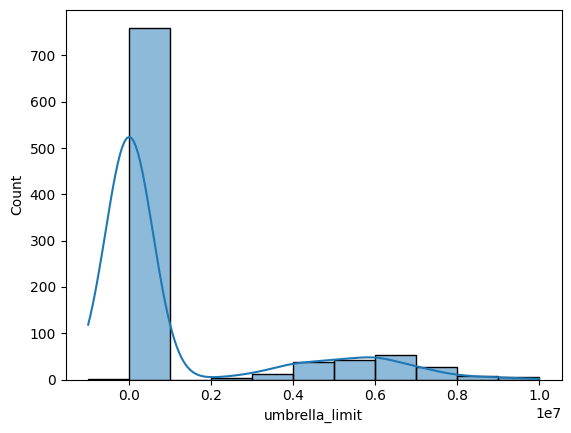

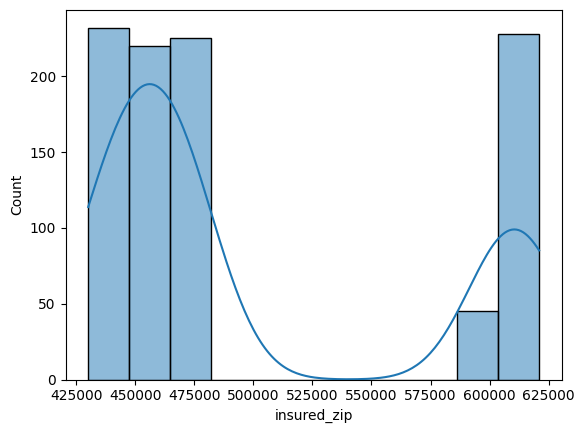

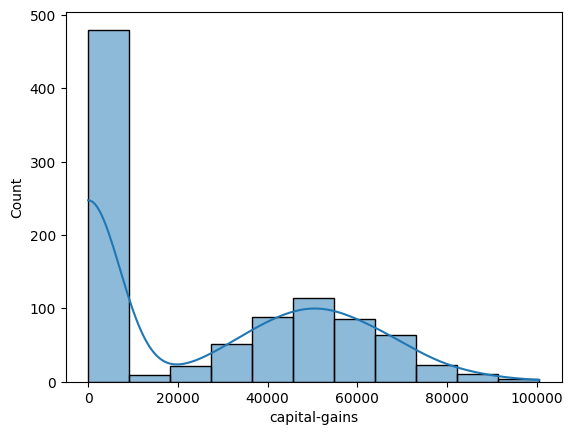

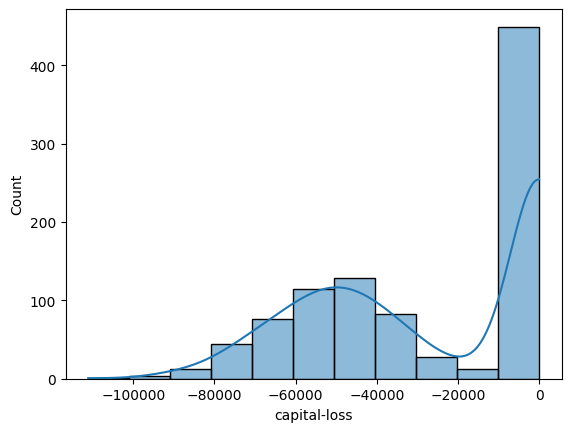

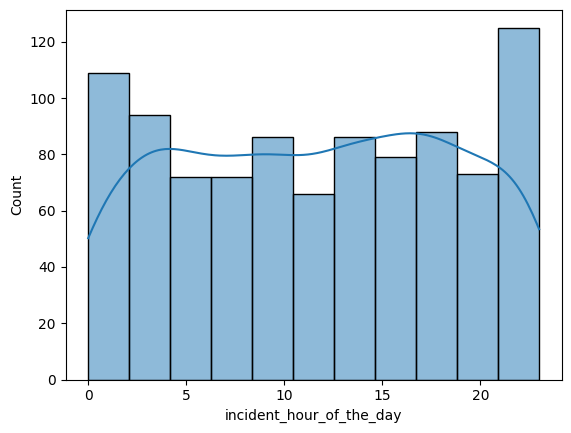

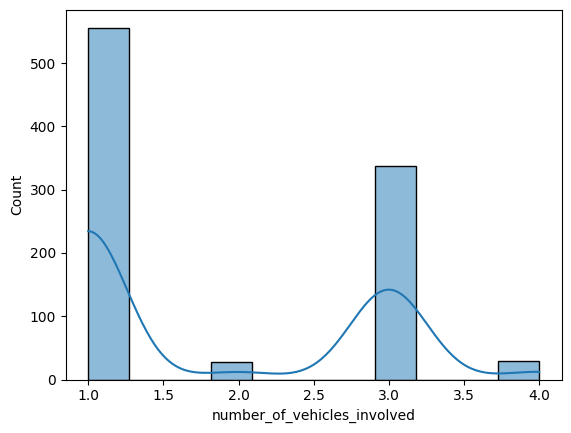

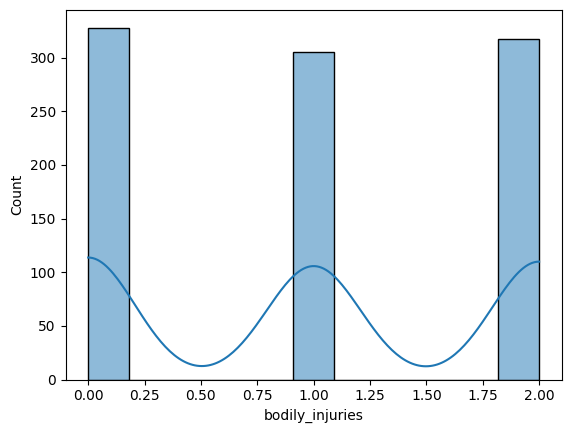

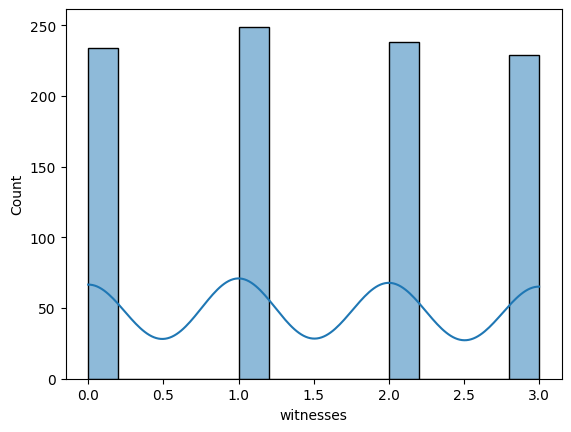

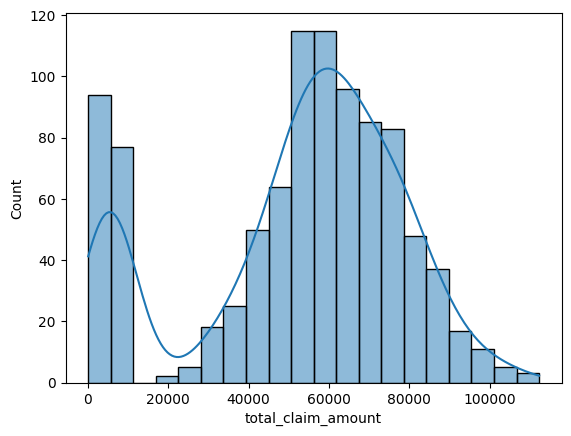

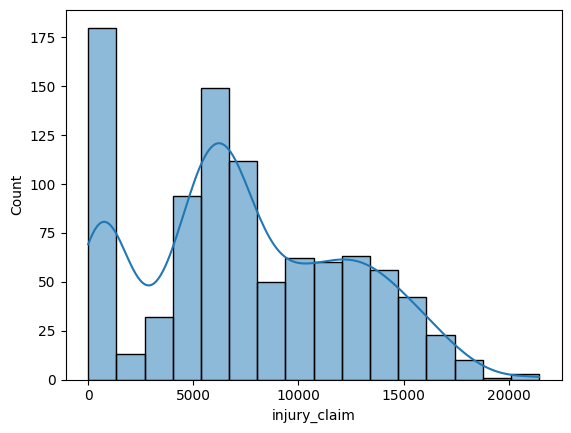

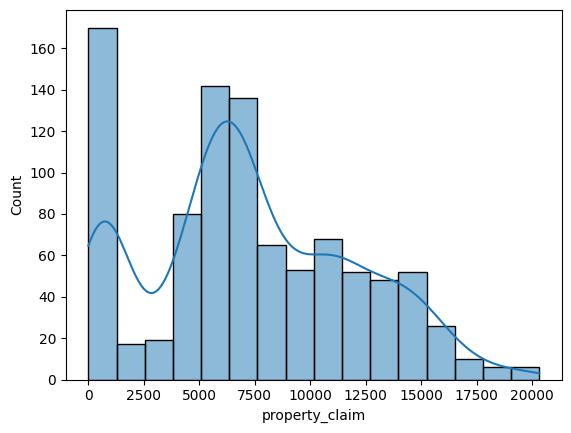

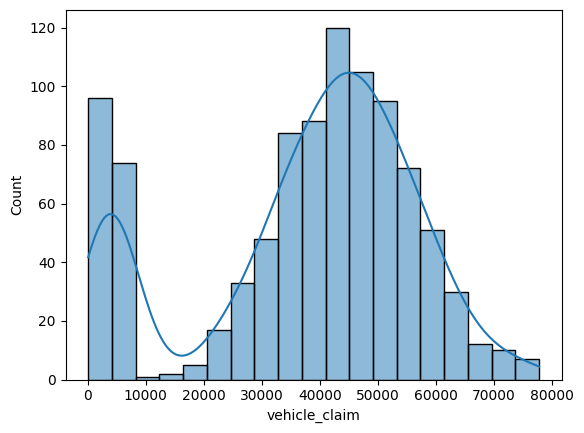

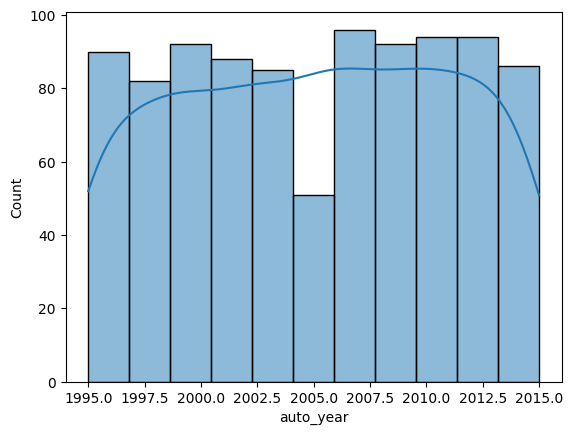

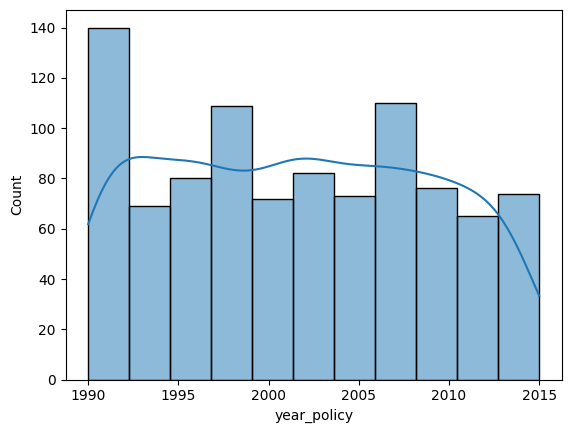

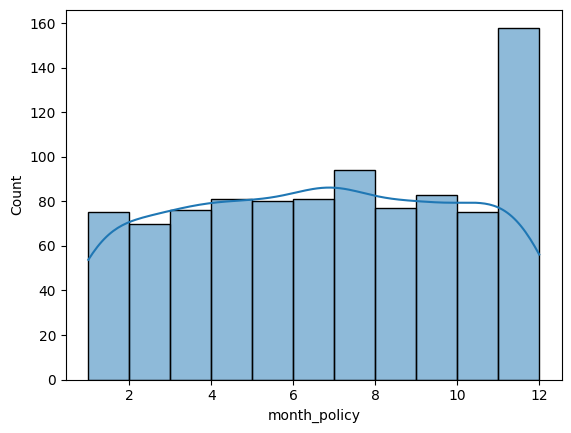

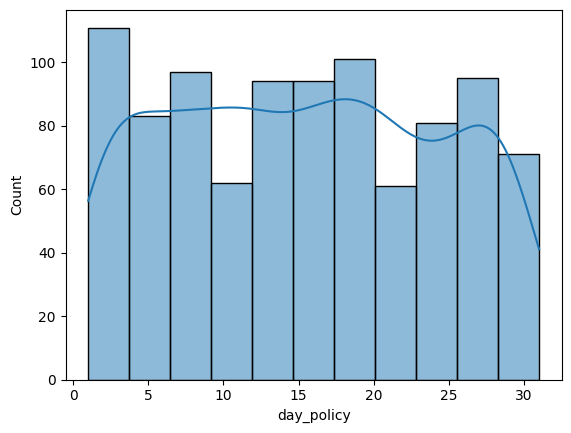

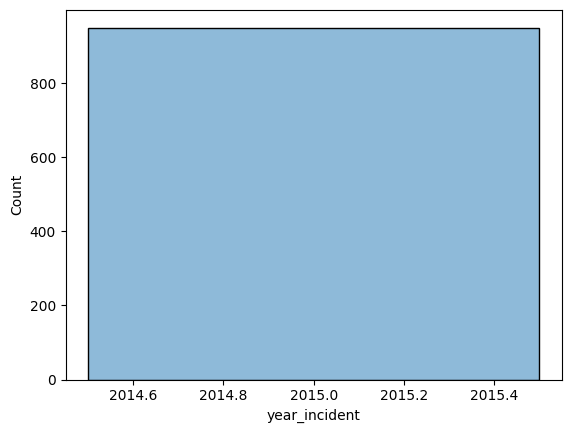

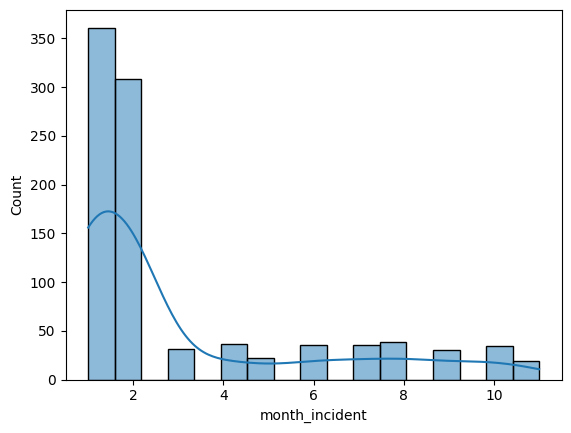

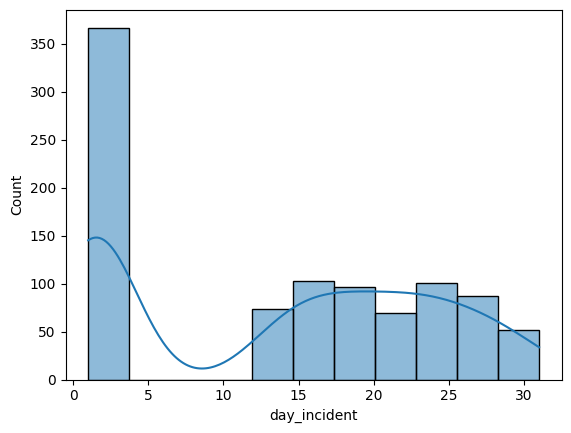

In [137]:
for i in numerical1.columns:
    sns.histplot(data=numerical1, x=i, kde=True)
    plt.show()

In [138]:
final = pd.merge(numerical1, merged, left_index=True, right_index=True)

In [139]:
final

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1,insured_education_level
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,1,0,0,1,0,1,0,1,4
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,1,0,0,0,1,1,0,1,0,4
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,1,0,0,0,1,1,0,1,0,6
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,1,0,0,1,1,0,1,0,6
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,3,38,941851,1000,1310.80,0,431289,0,0,20,...,1,0,0,1,1,0,1,1,0,5
946,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,0,1,0,1,1,0,1,1,0,6
947,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,1,0,0,0,1,1,0,0,1,5
948,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,0,1,1,0,0,1,0,0,1,1


# transformer 

In [140]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [141]:
pt = PowerTransformer()

In [142]:
transformed = pd.DataFrame(pt.fit_transform(final))

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


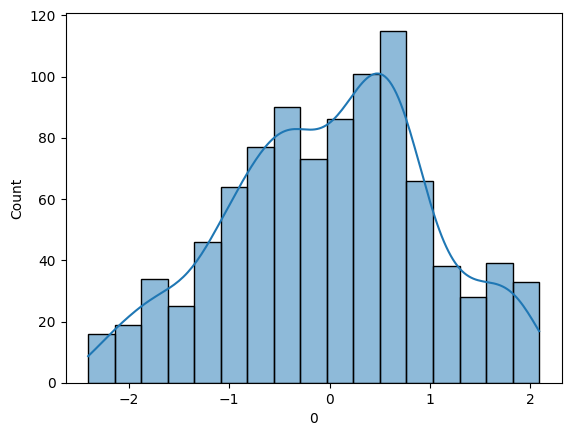

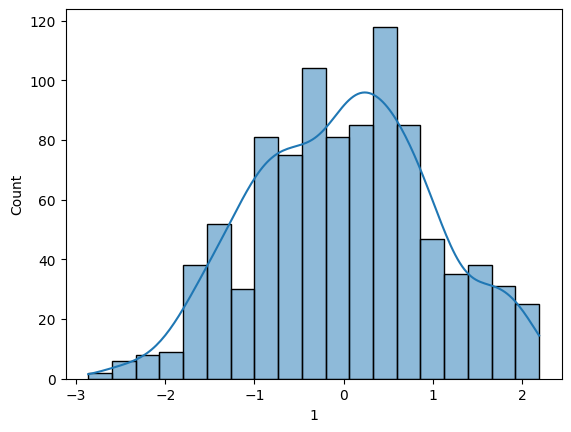

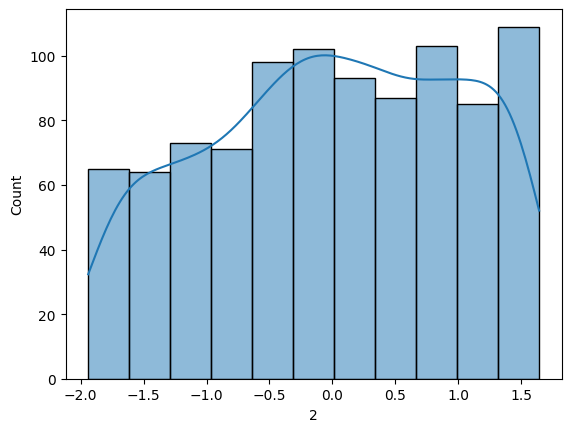

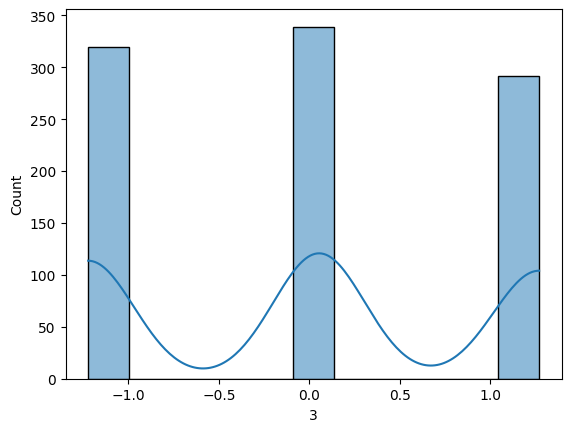

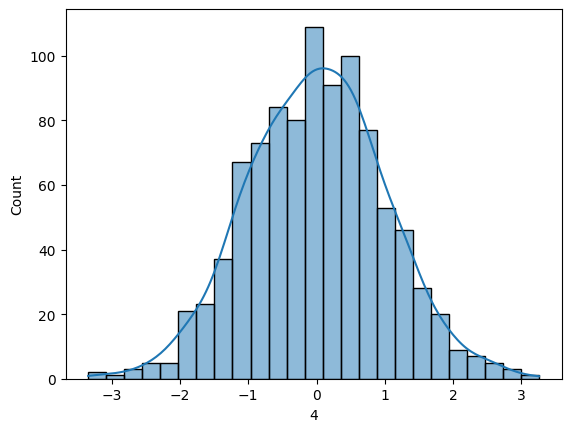

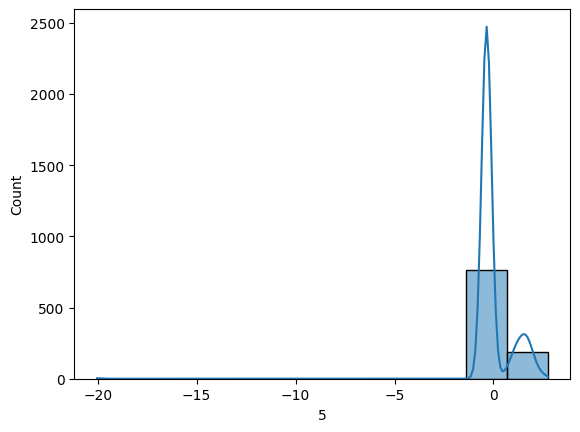

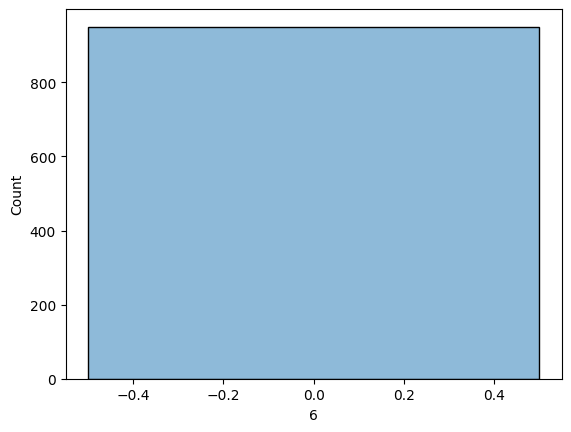

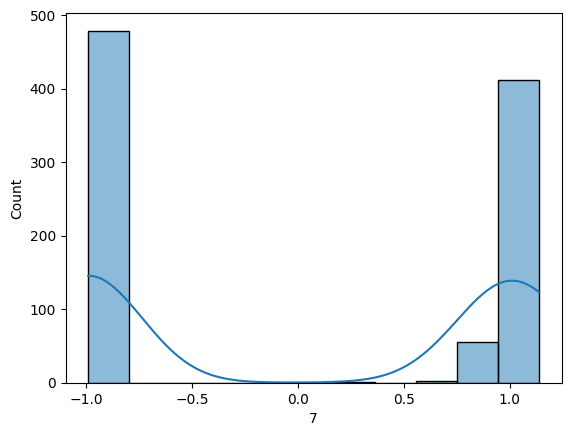

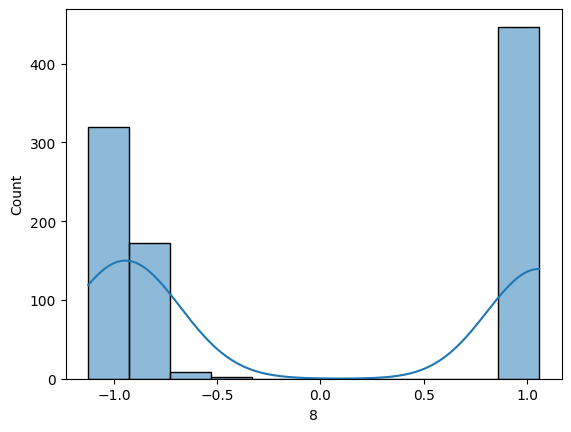

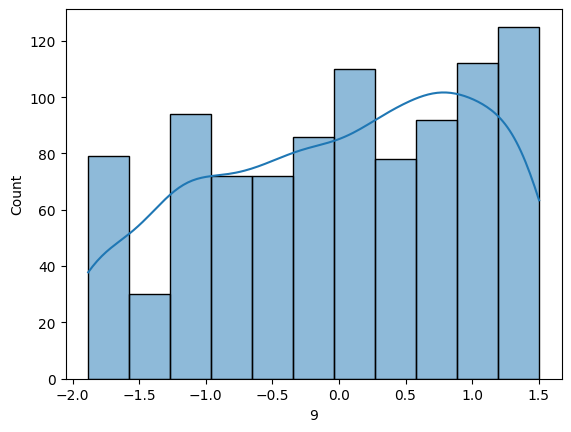

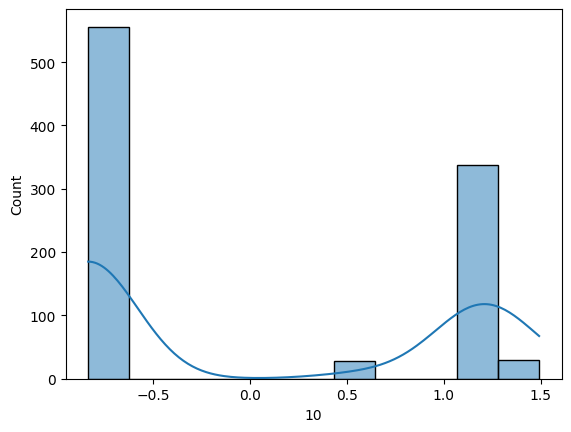

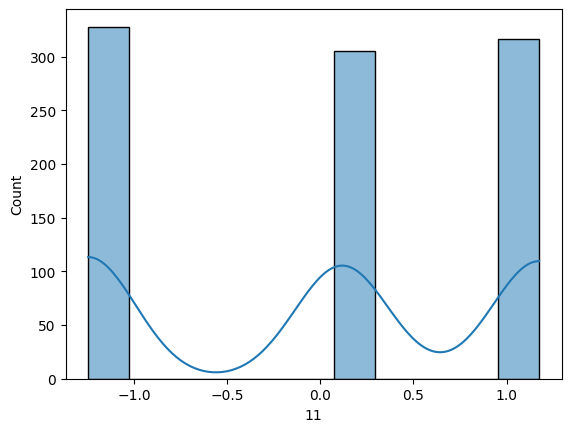

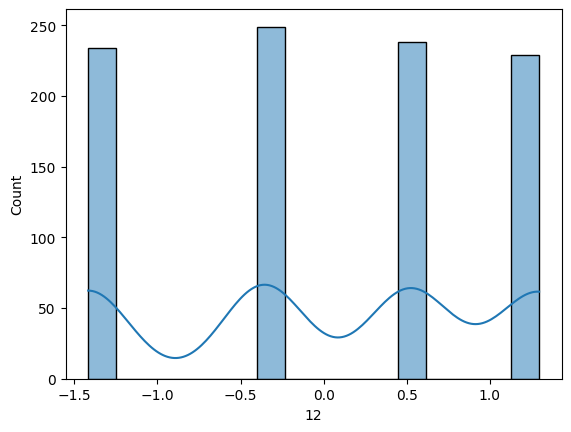

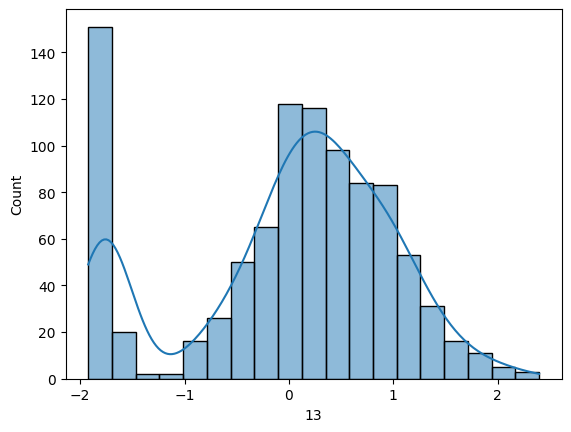

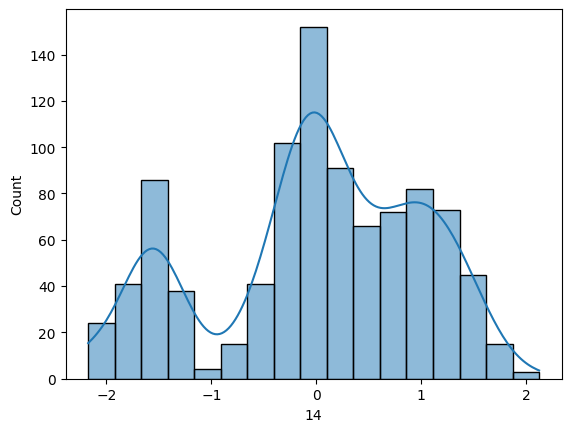

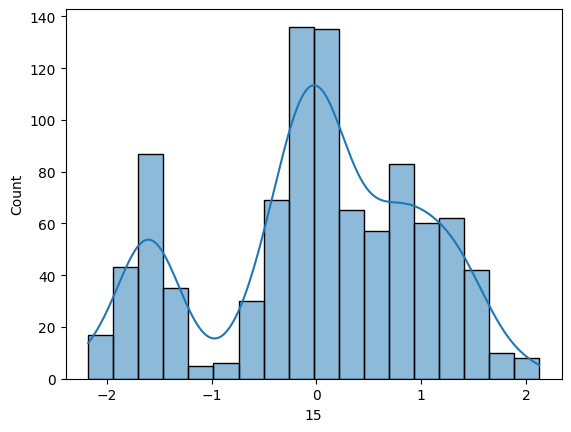

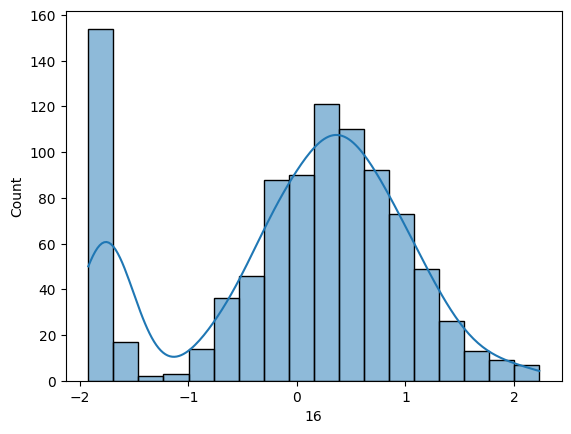

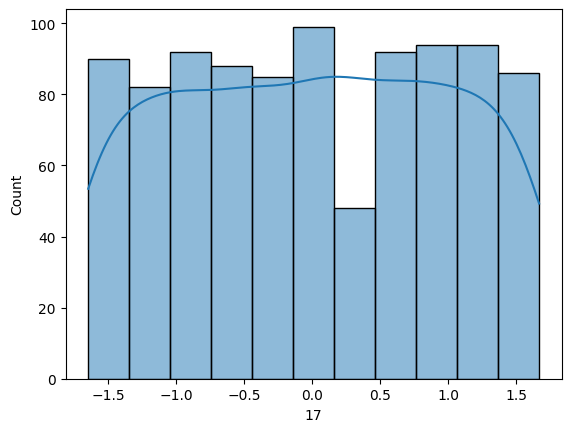

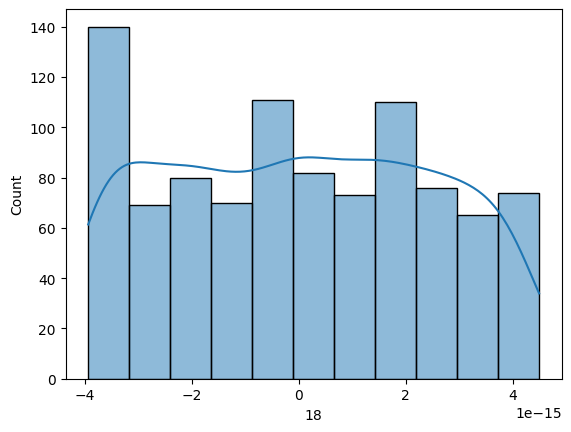

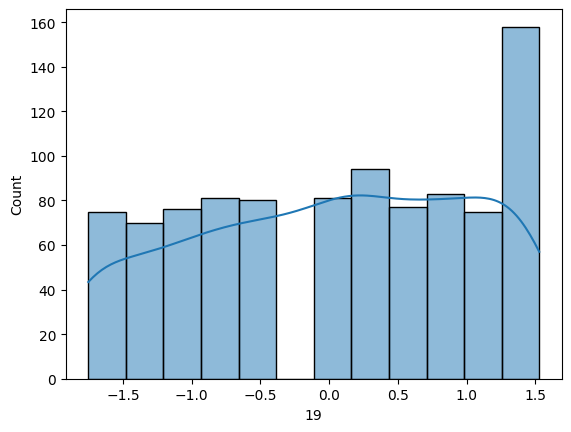

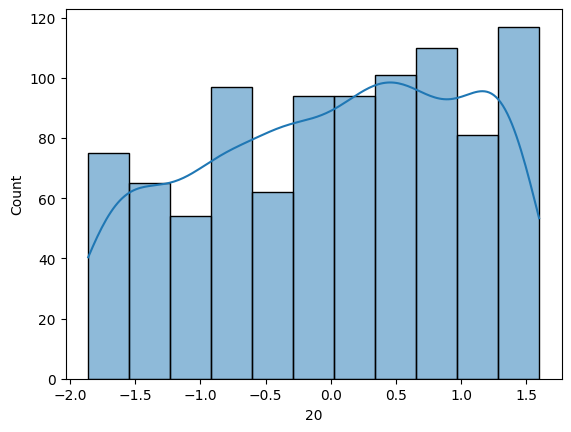

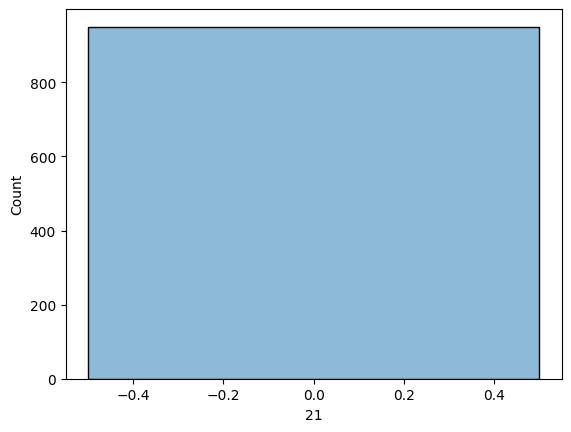

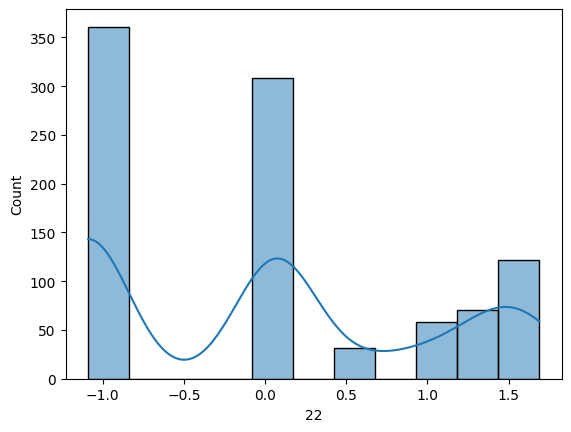

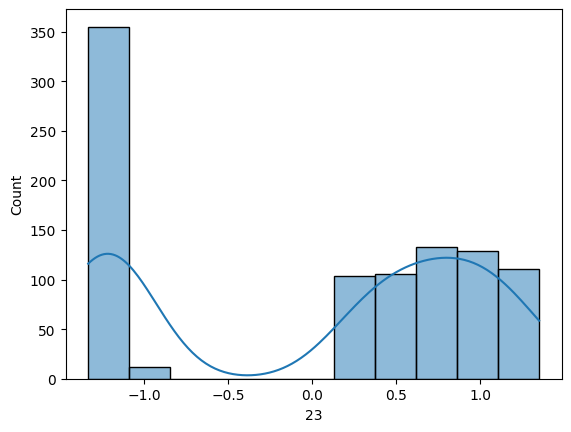

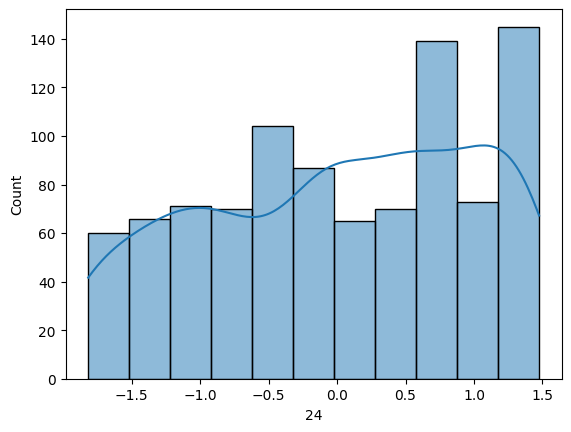

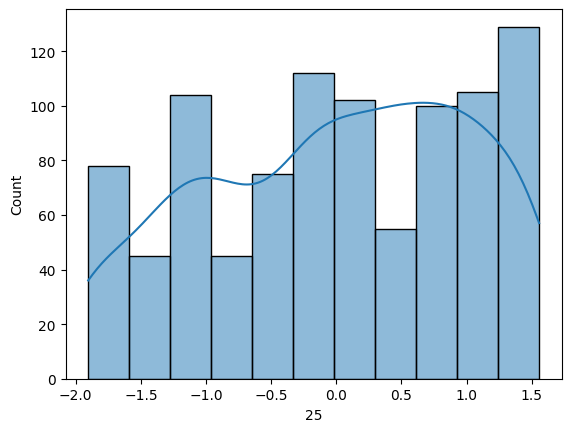

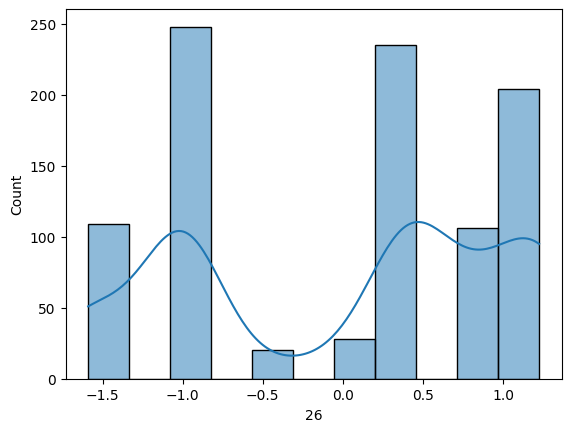

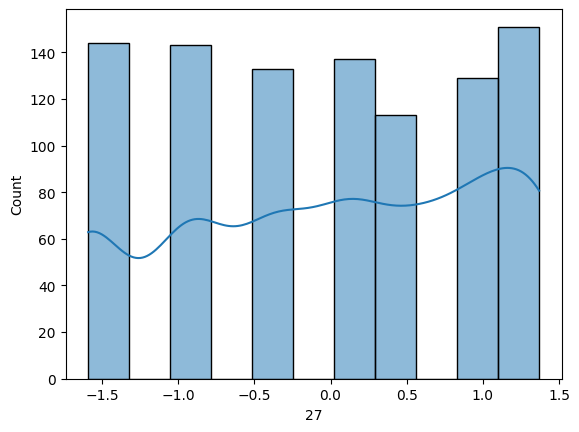

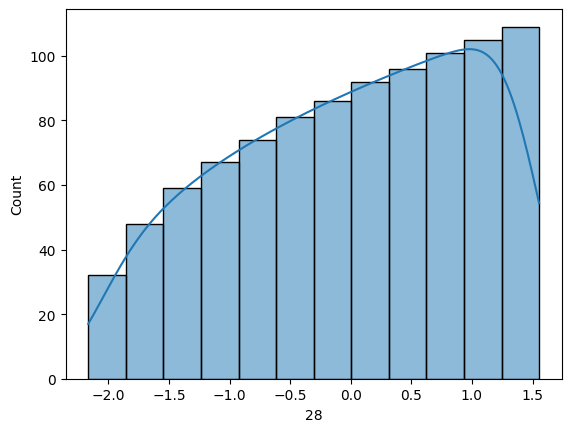

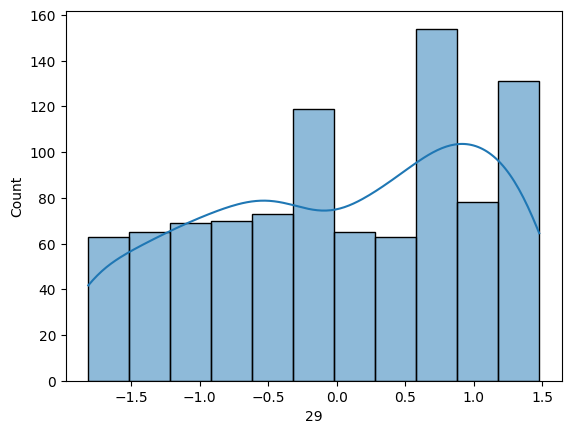

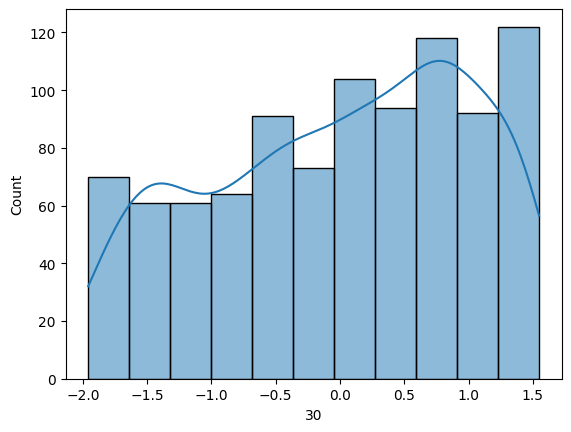

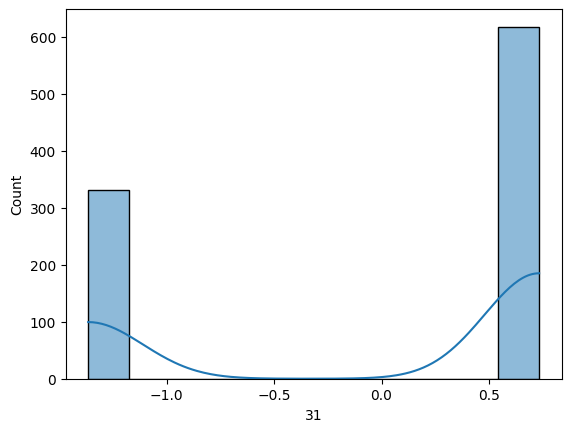

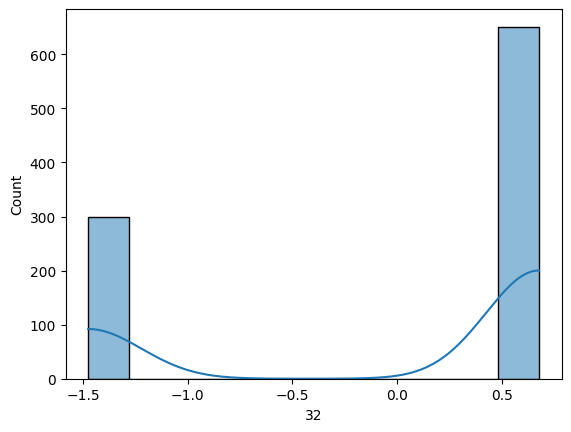

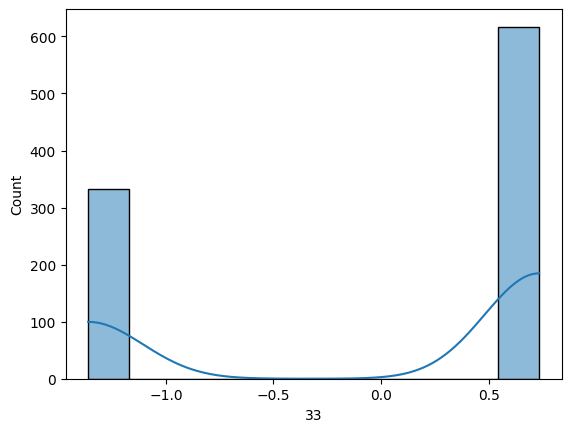

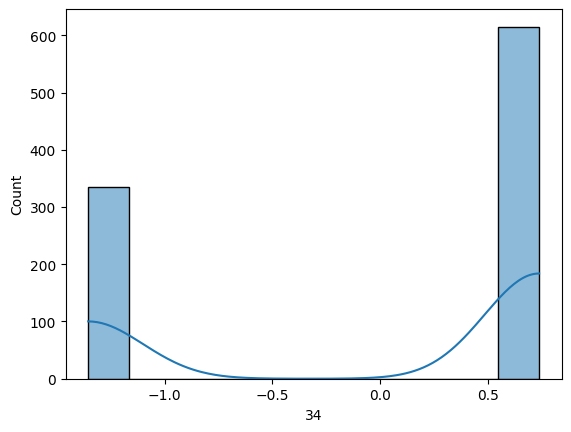

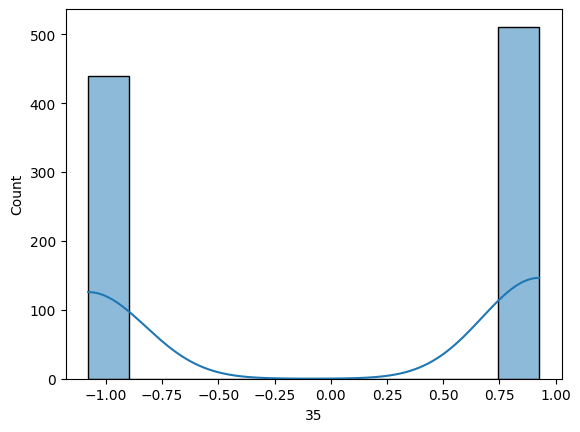

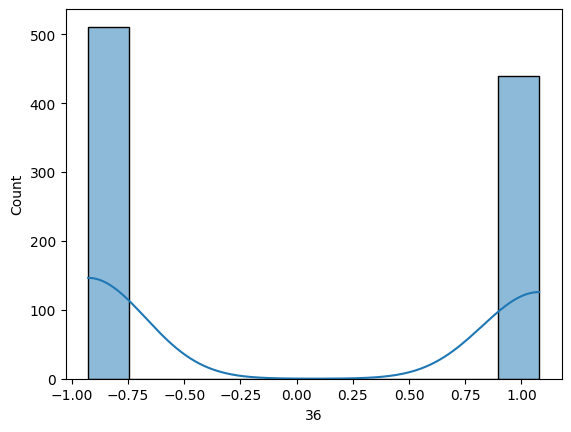

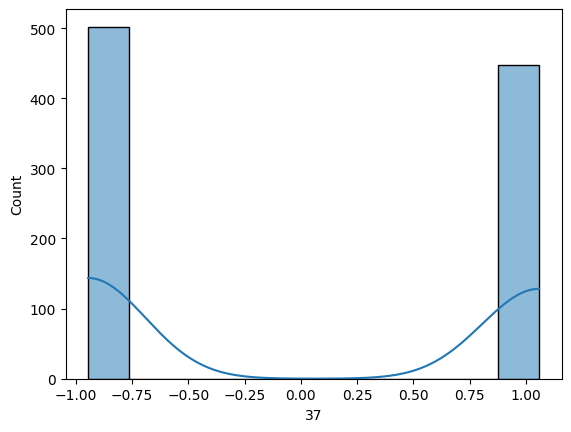

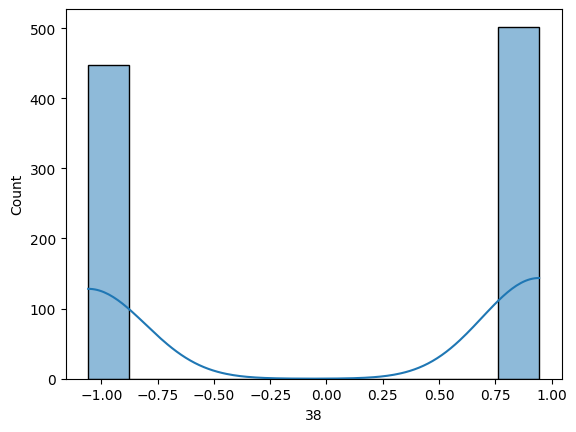

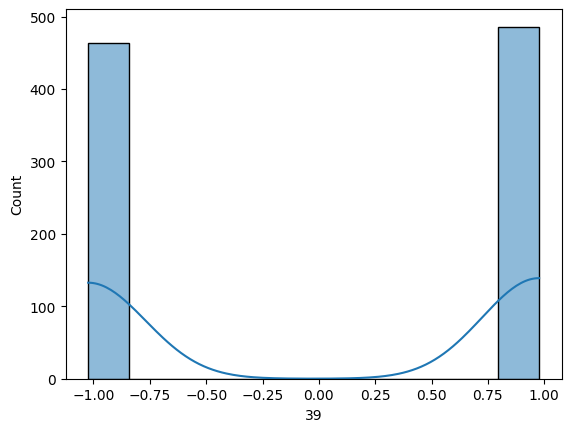

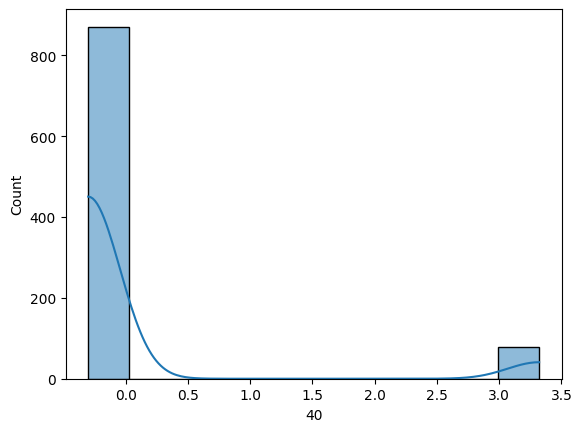

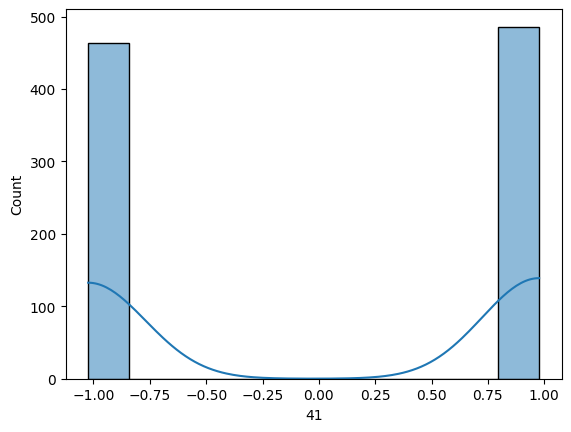

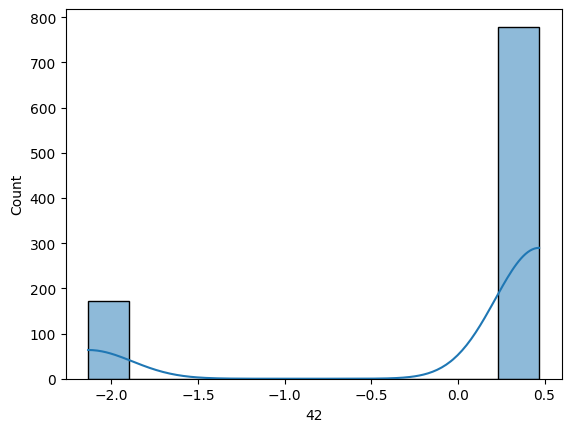

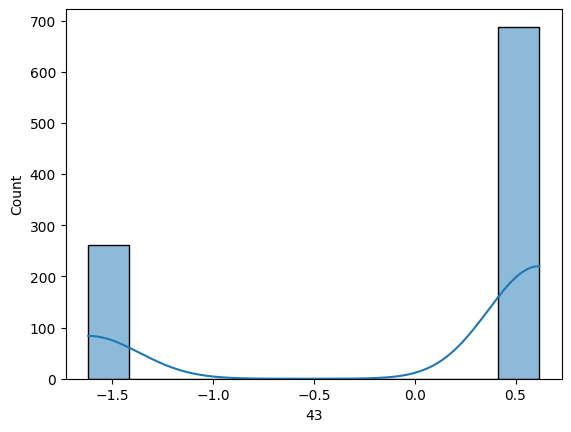

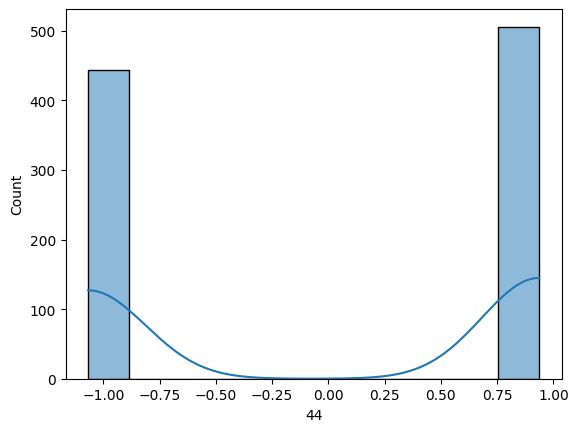

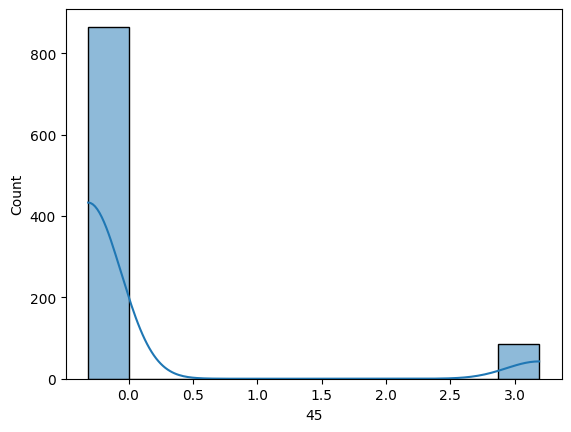

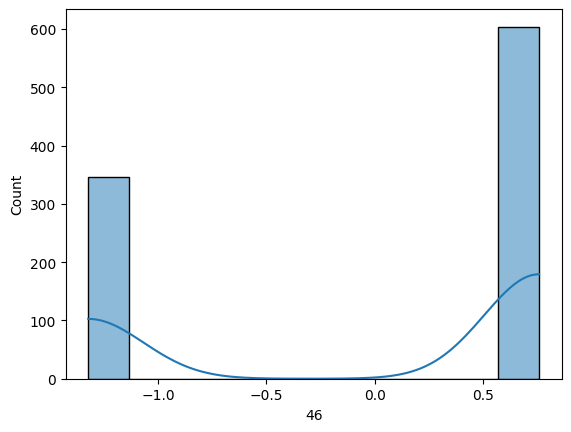

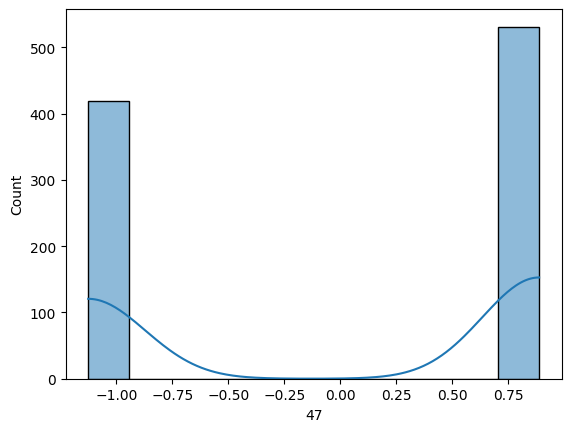

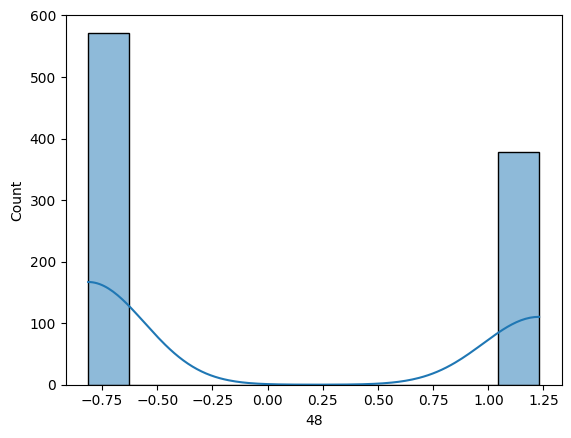

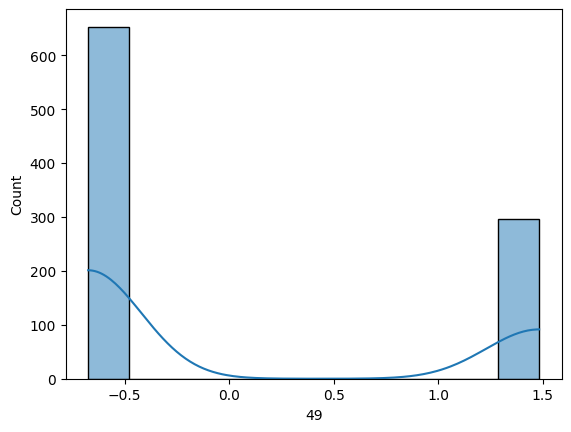

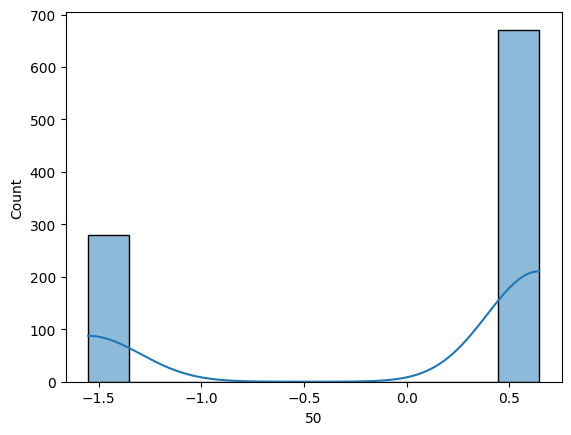

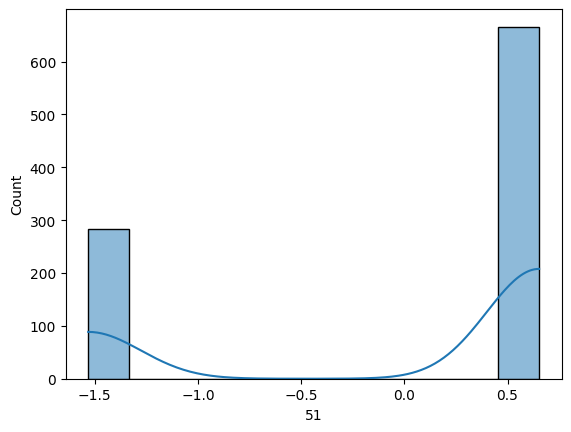

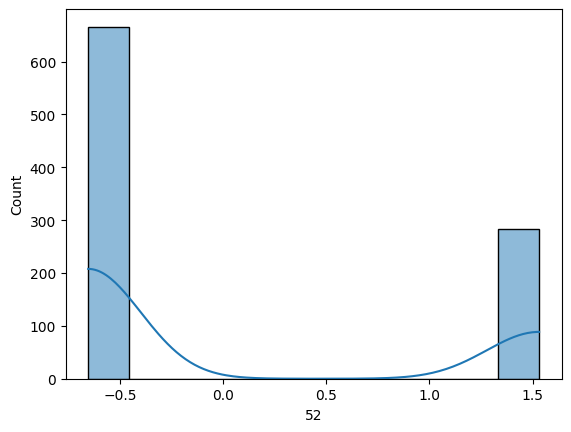

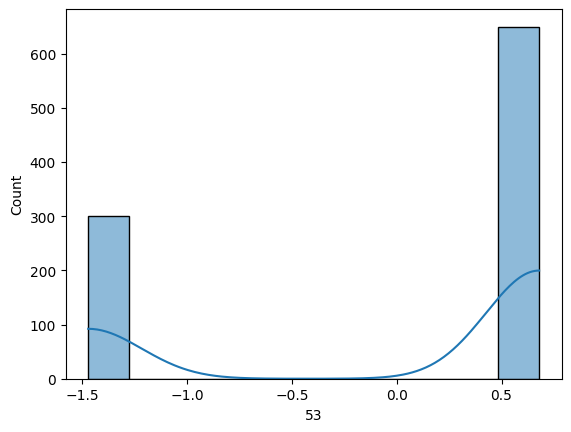

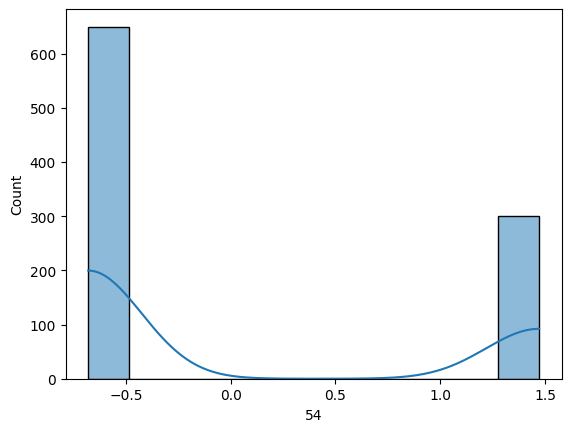

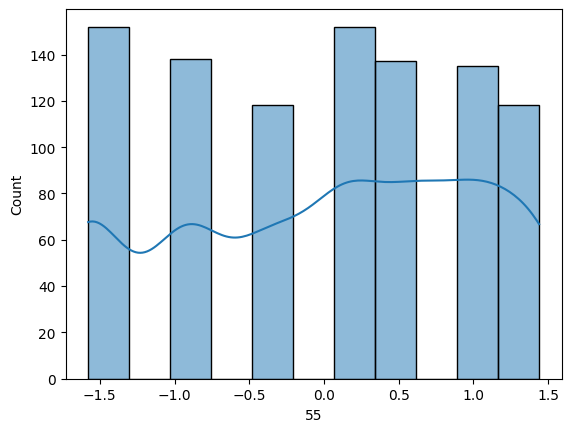

In [143]:
for i in transformed.columns:
    sns.histplot(data = transformed, x=i, kde=True)
    plt.show()

In [144]:
transformed.skew()

0    -0.134735
1    -0.003313
2    -0.161281
3     0.018990
4     0.003591
5    -7.682030
6     0.000000
7     0.023943
8     0.108208
9    -0.257235
10    0.379677
11   -0.125179
12   -0.151988
13   -0.523611
14   -0.409559
15   -0.365566
16   -0.530860
17   -0.011611
18    0.000000
19   -0.170788
20   -0.208651
21    0.000000
22    0.308576
23   -0.278989
24   -0.240619
25   -0.241913
26   -0.255722
27   -0.182118
28   -0.288297
29   -0.234207
30   -0.279665
31   -0.632396
32   -0.799104
33   -0.627538
34   -0.617852
35   -0.152257
36    0.152257
37    0.114048
38   -0.114048
39   -0.046402
40    3.024051
41   -0.046402
42   -1.668489
43   -1.004966
44   -0.131012
45    2.881135
46   -0.565262
47   -0.237821
48    0.417873
49    0.809658
50   -0.907422
51   -0.879739
52    0.879739
53   -0.793848
54    0.793848
55   -0.192984
dtype: float64

# Standard Scaler

In [145]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [146]:
st = StandardScaler()

In [147]:
x_scaled = pd.DataFrame(st.fit_transform(transformed))

In [148]:
x_scaled.skew()

0    -0.134735
1    -0.003313
2    -0.161281
3     0.018990
4     0.003591
5    -7.682030
6     0.000000
7     0.023943
8     0.108208
9    -0.257235
10    0.379677
11   -0.125179
12   -0.151988
13   -0.523611
14   -0.409559
15   -0.365566
16   -0.530860
17   -0.011611
18    0.027025
19   -0.170788
20   -0.208651
21    0.000000
22    0.308576
23   -0.278989
24   -0.240619
25   -0.241913
26   -0.255722
27   -0.182118
28   -0.288297
29   -0.234207
30   -0.279665
31   -0.632396
32   -0.799104
33   -0.627538
34   -0.617852
35   -0.152257
36    0.152257
37    0.114048
38   -0.114048
39   -0.046402
40    3.024051
41   -0.046402
42   -1.668489
43   -1.004966
44   -0.131012
45    2.881135
46   -0.565262
47   -0.237821
48    0.417873
49    0.809658
50   -0.907422
51   -0.879739
52    0.879739
53   -0.793848
54    0.793848
55   -0.192984
dtype: float64

# multicollinearity problem

In [154]:
matrix = x_scaled.corr()


In [150]:
for i in range(len(matrix)):
    for a in range(i):
        if abs(matrix[i][a]) > 0.85:
            print(i)

1
16
36
52
54


In [155]:
x_scaled1 = x_scaled.drop([1,16,36,52,54], axis=1)

In [156]:
x_scaled1

,0,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,53,55
0,1.074759,-0.026648,0.054833,0.609153,-0.345748,0.0,1.025549,1.058943,-0.902749,-0.836617,...,0.936734,-0.313474,-1.321236,0.888300,-0.812920,-0.674406,0.644823,-1.531362,-1.471960,0.594671
1,0.314484,-0.750128,1.271792,-0.251139,1.370017,0.0,-0.990352,1.058943,-0.433803,-0.836617,...,-1.067539,-0.313474,0.756867,-1.125746,-0.812920,-0.674406,0.644823,0.653013,0.679366,0.594671
2,-0.512758,0.587363,1.271792,0.634769,1.370017,0.0,0.950847,1.058943,-0.584911,1.200138,...,-1.067539,-0.313474,0.756867,-1.125746,-0.812920,-0.674406,0.644823,0.653013,0.679366,1.439582
3,0.536994,-1.270403,1.271792,0.645461,1.658083,0.0,1.010158,-0.997705,-0.902749,-0.836617,...,0.936734,-0.313474,-1.321236,0.888300,-0.812920,-0.674406,0.644823,0.653013,0.679366,1.439582
4,0.314484,-0.645491,0.054833,1.338102,1.658083,0.0,1.063686,-0.931214,1.149087,-0.836617,...,-1.067539,-0.313474,0.756867,-1.125746,-0.812920,1.482786,-1.550812,0.653013,0.679366,-0.922411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-2.291020,1.455215,0.054833,0.214372,-0.345748,0.0,-0.990352,1.058943,1.149087,-0.836617,...,0.936734,-0.313474,0.756867,-1.125746,-0.812920,1.482786,0.644823,-1.531362,0.679366,1.028178
946,0.759010,-1.471315,0.054833,0.732041,-0.345748,0.0,1.076454,1.058943,1.502834,-0.836617,...,-1.067539,-0.313474,-1.321236,0.888300,-0.812920,1.482786,0.644823,-1.531362,0.679366,1.439582
947,-0.551675,1.378406,-1.222419,0.512883,0.764981,0.0,0.950847,1.058943,-1.071630,1.200138,...,0.936734,-0.313474,0.756867,-1.125746,-0.812920,-0.674406,0.644823,0.653013,-1.471960,1.028178
948,1.954517,0.020657,1.271792,0.403719,1.370017,0.0,-0.990352,1.058943,-1.439036,-0.836617,...,-1.067539,-0.313474,-1.321236,0.888300,1.230133,-0.674406,-1.550812,0.653013,-1.471960,-0.922411


# Feature Selection 

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [158]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [159]:
rfe = RandomForestClassifier()

In [160]:
sfs = SequentialFeatureSelector(rfe, k_features='best', forward=False, cv=5)

In [161]:
selected = sfs.fit(x_scaled1, y)

In [162]:
selected_features = sfs.k_feature_idx_
selected_features

(4, 5, 19, 21, 24, 26, 27, 32, 42, 43, 46, 50)

In [165]:
selected1 = [4, 5, 19, 21, 24, 26, 27, 32, 42, 43, 46, 50]

In [166]:
final = x_scaled1[selected1]
final

,4,5,19,21,24,26,27,32,42,43,46,50
0,0.609153,-0.345748,1.004643,0.0,-1.162114,0.409477,-0.927172,0.677712,0.468521,-1.620480,-1.321236,0.644823
1,-0.251139,1.370017,-0.111170,0.0,-0.097971,0.826109,0.977024,-1.475553,-2.134375,0.617101,0.756867,0.644823
2,0.634769,1.370017,-0.111170,0.0,1.049327,-1.006859,-0.927172,0.677712,0.468521,0.617101,0.756867,0.644823
3,0.645461,1.658083,-0.409862,0.0,-1.470897,-0.496793,-1.591207,0.677712,0.468521,0.617101,-1.321236,0.644823
4,1.338102,1.658083,-0.111170,0.0,1.049327,-1.006859,-1.591207,0.677712,-2.134375,0.617101,0.756867,-1.550812
...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.214372,-0.345748,0.178410,0.0,-1.162114,-1.590049,0.560431,0.677712,0.468521,0.617101,0.756867,0.644823
946,0.732041,-0.345748,-0.409862,0.0,0.606463,0.409477,0.113177,0.677712,0.468521,0.617101,-1.321236,0.644823
947,0.512883,0.764981,-1.384698,0.0,-1.470897,-1.590049,-1.591207,0.677712,0.468521,-1.620480,0.756867,0.644823
948,0.403719,1.370017,1.268649,0.0,-0.346998,-1.006859,-1.591207,0.677712,0.468521,0.617101,-1.321236,-1.550812


# imbalance dataset

In [167]:
from imblearn.over_sampling import SMOTE

In [168]:
smote = SMOTE()

In [169]:
x1, y1 = smote.fit_resample(final, y)

In [170]:
x2, y2 = smote.fit_resample(x_scaled1, y)

In [171]:
y1.value_counts()

1    716
0    716
Name: fraud_reported, dtype: int64

# Model Building

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.25, random_state=42, stratify=y2)

In [174]:
y_test.value_counts()

1    179
0    179
Name: fraud_reported, dtype: int64

In [175]:
y_train.value_counts()

1    537
0    537
Name: fraud_reported, dtype: int64

In [176]:
models = {'Logistic' : LogisticRegression(), 'SVC' : SVC(), 'DecisionTreeClassifier' : DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'GaussianNB': GaussianNB(), 'AdaBoostClassifier': AdaBoostClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier(), 'KNeighborsClassifier': KNeighborsClassifier()}

In [177]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('accuracy_score', accuracy_score(y_train, y_pred_train))
    print('accuracy_score', accuracy_score(y_test, y_pred_test))
    print('..........................................')
    print('roc_auc_score', roc_auc_score(y_train, y_pred_train))
    print('roc_auc_score', roc_auc_score(y_test, y_pred_test))
    print('...............................................')
    print('confusion_matrix_train')
    print(confusion_matrix(y_train, y_pred_train))
    print('confusion_matrix on test')
    print(confusion_matrix(y_test, y_pred_test))
    print('..................................')
    print(classification_report(y_train, y_pred_train))
    print('...............................')
    print(classification_report(y_test, y_pred_test))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Logistic
accuracy_score 0.7970204841713222
accuracy_score 0.7486033519553073
..........................................
roc_auc_score 0.7970204841713222
roc_auc_score 0.7486033519553074
...............................................
confusion_matrix_train
[[445  92]
 [126 411]]
confusion_matrix on test
[[141  38]
 [ 52 127]]
..................................
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       537
           1       0.82      0.77      0.79       537

    accuracy                           0.80      1074
   macro avg       0.80      0.80      0.80      1074
weighted avg       0.80      0.80      0.80      1074

...............................
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       179
           1       0.77      0.71      0.74       179

    accuracy                           0.75       358
   macro avg

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [178]:
for model_name, model in models.items():
    train_scores = cross_val_score(model, x_train, y_train, cv=5)
    test_scores = cross_val_score(model, x_test, y_test, cv=5)
    print(model_name)
    print('Train Scores:', train_scores.mean())
    print('Test Scores:', test_scores.mean())

Logistic
Train Scores: 0.7700239078461204
Test Scores: 0.6926447574334899
SVC
Train Scores: 0.8621995218430776
Test Scores: 0.7989436619718309
DecisionTreeClassifier
Train Scores: 0.8147098456857205
Test Scores: 0.7905320813771517
RandomForestClassifier
Train Scores: 0.8715105411866986
Test Scores: 0.8295774647887324
GaussianNB
Train Scores: 0.6657291893066726
Test Scores: 0.6538341158059467
AdaBoostClassifier
Train Scores: 0.8631210606389915
Test Scores: 0.790414710485133
GradientBoostingClassifier
Train Scores: 0.8836209519669638
Test Scores: 0.8406494522691705
KNeighborsClassifier
Train Scores: 0.6536405129319712
Test Scores: 0.6172535211267606


C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Random Forest Classifier

In [179]:
Rfc = RandomForestClassifier

In [180]:
max_train = 0.0
min_test = 1.0
random_state = 0

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.25, random_state=i, stratify=y1)
    
    
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    
    
    y_pred_train = rfc.predict(x_train)
    y_pred_test = rfc.predict(x_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    if accuracy_train > max_train and accuracy_test < min_test:
        max_train = accuracy_train
        min_test = accuracy_test
        random_state = i

In [181]:
max_train

1.0

In [182]:
min_test 

0.8798882681564246

In [183]:
random_state

0

In [184]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.25, random_state=0, stratify=y1)

In [185]:
random = RandomForestClassifier(max_depth=5)

In [186]:
random.fit(x_train1, y_train1)
    
    
y_pred_train1 = random.predict(x_train1)
y_pred_test1 = random.predict(x_test1)
    
accuracy_train = accuracy_score(y_train1, y_pred_train1)
accuracy_test = accuracy_score(y_test1, y_pred_test1)

In [187]:
print('accuracy_train', accuracy_train, 'accuracy_test', accuracy_test)

accuracy_train 0.8770949720670391 accuracy_test 0.8491620111731844


# confusion_matrix

In [188]:
print('accuarcy on_traning')
print(confusion_matrix(y_train1, y_pred_train1))

accuarcy on_traning
[[464  73]
 [ 59 478]]


In [189]:
print('accuarcy on_test')
print(confusion_matrix(y_test1, y_pred_test1))

accuarcy on_test
[[152  27]
 [ 27 152]]


# Classification_report

In [190]:
print('accuarcy on_traning')
print(classification_report(y_train1, y_pred_train1))

accuarcy on_traning
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       537
           1       0.87      0.89      0.88       537

    accuracy                           0.88      1074
   macro avg       0.88      0.88      0.88      1074
weighted avg       0.88      0.88      0.88      1074



In [191]:
print('accuarcy on_test')
print(classification_report(y_test1, y_pred_test1))

accuarcy on_test
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       179
           1       0.85      0.85      0.85       179

    accuracy                           0.85       358
   macro avg       0.85      0.85      0.85       358
weighted avg       0.85      0.85      0.85       358



# # Hyperparameter Tuning,,,,,,,,,,,,,,,,,,,,,,,,,,

In [171]:
random1 = RandomForestClassifier(max_depth=5)

In [168]:
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]  
}


In [172]:
gsc = GridSearchCV(param_grid = param_grid, cv=5, estimator = random1)

In [173]:
gsc.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [177]:
best_params = gsc.best_params_
best_score = gsc.best_score_

In [180]:
print("Best Parameters:", best_params)


Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [179]:
print("Best Score:", best_score)

Best Score: 0.8817474462073462


# AFTER APPLYING HYPERPARAMETER TUNING 

In [192]:
random2 = RandomForestClassifier(max_depth=4, bootstrap=False, criterion='entropy', max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150)

In [193]:
random2.fit(x_train1, y_train1)
    
    
y_pred_train4 = random2.predict(x_train1)
y_pred_test4 = random2.predict(x_test1)
    
accuracy_train0 = accuracy_score(y_train1, y_pred_train4)
accuracy_test0 = accuracy_score(y_test1, y_pred_test4)

In [226]:
print('accuracy_train', accuracy_train0, 'accuracy_test', accuracy_test0)

accuracy_train 0.8584729981378026 accuracy_test 0.8463687150837989


# Confusion_Matrix

In [194]:
print('accuarcy on_traning')
print(confusion_matrix(y_train1, y_pred_train4))

accuarcy on_traning
[[466  71]
 [ 84 453]]


In [195]:
print('accuarcy on_test')
print(confusion_matrix(y_test1, y_pred_test4))

accuarcy on_test
[[150  29]
 [ 28 151]]


# classification_report

In [196]:
print('accuarcy on_traning')
print(classification_report(y_train1, y_pred_train4))

accuarcy on_traning
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       537
           1       0.86      0.84      0.85       537

    accuracy                           0.86      1074
   macro avg       0.86      0.86      0.86      1074
weighted avg       0.86      0.86      0.86      1074



In [197]:
print('accuarcy on_test')
print(classification_report(y_test1, y_pred_test4))

accuarcy on_test
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       179
           1       0.84      0.84      0.84       179

    accuracy                           0.84       358
   macro avg       0.84      0.84      0.84       358
weighted avg       0.84      0.84      0.84       358

